In [1]:
from datetime import datetime
from deepburtsev.core.pipeline_manager import PipelineManager
from deepburtsev.core.utils import scrab_data, get_table, plot_i, plot_j, plot_k
from collections import OrderedDict
from os.path import join, isfile

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/mks/envs/intent_script/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2018-04-05 19:11:38.934 DEBUG in 'matplotlib.backends'['__init__'] at line 90: backend module://ipykernel.pylab.backend_inline version unknown


Используя абстракции, описанные в прошлом отчёте, был написан функционал позволяющий строить и перебирать различные варианты пайплайнов в автоматическом режиме. Основными элементами этого функционала являются генератор пайплайнов и менеджер пайплайнов.

Пайплайн менеджер принимает на вход в качестве параметров три обязательных переменных (см. пример ниже): язык, имя датасета, имя файла в котором содержится датасет. Также при инициализации класса PipelineManager можно указать, осуществлять подбор гиперпараметров для модели или не осуществлять. При инициализации класса, строится нужная структура путей к файлам с описанием параметров отдельных моделей и операций, логам, папкам сохранения и т.д. 

In [2]:
language = 'russian'
dataset_name = 'vkusvill'
file_name = 'vkusvill_all_categories.csv'

date = datetime.now()

Класс имеет всего один основной метод .run(), этот метод принимает на вход два упорядоченных словаря. В одном из них в упрощённом виде кодируется информация о структуре общего пайплайна (см. ниже neural_pipe), а в другом кодируется информация о том, какие элементы пайплайна подлежат перестройке (см. neural_struct), и какой именно. На примере ниже, рассматрев словарь neural_struct или linear_struct можно понять что когда ключу соответствует список содержащий булевые значение, это значит что данный элемент пайплайна может включаться и выключаться из него, а когда ключу соответствует список неких строк, то значит, данный элемент может принимать значения указанные в списке.

In [3]:
neural_struct = {'Lemmatizer': [False, True], 'model': ['CNN']}
neural_pipe = OrderedDict(Tokenizer=True,
                          Lemmatizer=True,
                          vectorizer='FasttextVectorizer',
                          model='CNN',
                          Resulter='Resulter')

In [4]:
linear_struct = {'Lemmatizer': [False, True],
                 'vectorizer': ['tf-idf', 'count'],
                 'model': ['LogisticRegression',
                           'RandomForestClassifier',
                           'LGBMClassifier',
                           'LinearSVC']}
linear_pipe = OrderedDict(Tokenizer=True,
                          Lemmatizer=True,
                          Textсoncatenator=True,
                          vectorizer='tf-idf',
                          model='LogisticRegression',
                          Resulter='Resulter')

На основе данных словарей поданных на вход, внутри класса PipelineManager инициализируется генератор пайплайнов, который может осуществлять как grid search так и генерить случайный комбинации пайплайнов и их конфигов. На выходе он выдаёт список компонентов, и конфигов, на основе которых инициализируются и прогоняются классы Pipeline. При запуске метода .run() по умолчанию генерируется перебор всех возможных конфигураций пайплайнов, а также в процессе их прогона выполняется автоматический скоринг, и запись всевозможных логов.

/home/mks/envs/intent_script/lib/python3.6/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (6,7,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predic

[ Starting tokenization ... ]


100%|██████████| 58780/58780 [00:09<00:00, 5986.87it/s]
2018-04-05 19:15:52.638 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 16: Loading dictionaries from /home/mks/envs/intent_script/lib/python3.6/site-packages/pymorphy2_dicts/data
2018-04-05 19:15:52.668 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 20: format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168
  0%|          | 17/58780 [00:00<07:43, 126.81it/s]

[ Tokenization was done. ]
[ Starting lemmatization ... ]


100%|██████████| 58780/58780 [00:00<00:00, 526112.79it/s]


[ Ended lemmatization. ]
[ Starting text merging ... ]
[ Text concatenation was ended. ]


/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (6,7,10,14) have mixed types. Specify dtype option on import or 

[ Starting tokenization ... ]


100%|██████████| 58780/58780 [00:10<00:00, 5482.68it/s]
2018-04-05 19:21:20.714 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 16: Loading dictionaries from /home/mks/envs/intent_script/lib/python3.6/site-packages/pymorphy2_dicts/data
2018-04-05 19:21:20.742 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 20: format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168
  0%|          | 16/58780 [00:00<06:21, 153.90it/s]

[ Tokenization was done. ]
[ Starting lemmatization ... ]


100%|██████████| 58780/58780 [00:00<00:00, 564923.73it/s]


[ Ended lemmatization. ]
[ Starting text merging ... ]
[ Text concatenation was ended. ]


/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (6,7,10,14) have mixed types. Specify dtype option on import or 

[ Starting tokenization ... ]


100%|██████████| 58780/58780 [00:10<00:00, 5771.29it/s]
2018-04-05 19:27:19.87 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 16: Loading dictionaries from /home/mks/envs/intent_script/lib/python3.6/site-packages/pymorphy2_dicts/data
2018-04-05 19:27:19.112 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 20: format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168
  0%|          | 17/58780 [00:00<07:48, 125.52it/s]

[ Tokenization was done. ]
[ Starting lemmatization ... ]


100%|██████████| 58780/58780 [00:00<00:00, 560663.65it/s]


[ Ended lemmatization. ]
[ Starting text merging ... ]
[ Text concatenation was ended. ]


/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

[ Starting tokenization ... ]


100%|██████████| 58780/58780 [00:10<00:00, 5760.43it/s]
2018-04-05 19:34:16.98 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 16: Loading dictionaries from /home/mks/envs/intent_script/lib/python3.6/site-packages/pymorphy2_dicts/data
2018-04-05 19:34:16.123 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 20: format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168
  0%|          | 17/58780 [00:00<07:57, 123.09it/s]

[ Tokenization was done. ]
[ Starting lemmatization ... ]


100%|██████████| 58780/58780 [00:00<00:00, 495956.94it/s]


[ Ended lemmatization. ]
[ Starting text merging ... ]
[ Text concatenation was ended. ]


/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (6,7,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  
  1%|          | 484/58780 [00:00<00:12, 4835.60it/s]

[ Starting tokenization ... ]


100%|██████████| 58780/58780 [00:11<00:00, 5342.49it/s]
2018-04-05 19:40:01.240 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 16: Loading dictionaries from /home/mks/envs/intent_script/lib/python3.6/site-packages/pymorphy2_dicts/data
2018-04-05 19:40:01.268 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 20: format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168
  0%|          | 15/58780 [00:00<06:46, 144.63it/s]

[ Tokenization was done. ]
[ Starting lemmatization ... ]


100%|██████████| 58780/58780 [00:00<00:00, 524684.10it/s]


[ Ended lemmatization. ]
[ Starting text merging ... ]
[ Text concatenation was ended. ]


/home/mks/envs/intent_script/lib/python3.6/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (6,7,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  
  1%|          | 530/58780 [00:00<00:11, 5286.10it/s]

[ Starting tokenization ... ]


100%|██████████| 58780/58780 [00:10<00:00, 5598.66it/s]
2018-04-05 19:46:32.549 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 16: Loading dictionaries from /home/mks/envs/intent_script/lib/python3.6/site-packages/pymorphy2_dicts/data
2018-04-05 19:46:32.578 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 20: format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168
  0%|          | 17/58780 [00:00<08:09, 120.03it/s]

[ Tokenization was done. ]
[ Starting lemmatization ... ]


100%|██████████| 58780/58780 [00:00<00:00, 538041.09it/s]


[ Ended lemmatization. ]
[ Starting text merging ... ]
[ Text concatenation was ended. ]


/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (6,7,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  
  1%|          | 513/58780 [00:00<00:11, 5126.64it/s]

[ Starting tokenization ... ]


100%|██████████| 58780/58780 [00:10<00:00, 5574.12it/s]
2018-04-05 19:52:27.583 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 16: Loading dictionaries from /home/mks/envs/intent_script/lib/python3.6/site-packages/pymorphy2_dicts/data
2018-04-05 19:52:27.610 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 20: format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168
  0%|          | 17/58780 [00:00<08:09, 120.11it/s]

[ Tokenization was done. ]
[ Starting lemmatization ... ]


100%|██████████| 58780/58780 [00:00<00:00, 609372.61it/s]


[ Ended lemmatization. ]
[ Starting text merging ... ]
[ Text concatenation was ended. ]


2018-04-05 19:57:34.712 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1354: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/mks/intent/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-04-05 19:57:34.743 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1354: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/mks/intent/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-04-05 19:57:35.11 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1354: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans ('/home/mks/intent/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-04-05 19:57:35.183

[ Starting tokenization ... ]


100%|██████████| 58780/58780 [00:09<00:00, 6173.36it/s]


[ Tokenization was done. ]


  1%|          | 250/49830 [00:00<00:19, 2497.95it/s]

[ Starting vectorization ... ]
[ Vectorization of train part of dataset ... ]


  5%|▍         | 220/4475 [00:00<00:01, 2192.29it/s]

[ Vectorization of valid part of dataset ... ]


  5%|▍         | 205/4475 [00:00<00:02, 2049.49it/s]

[ Vectorization of test part of dataset ... ]


100%|██████████| 4475/4475 [00:02<00:00, 2012.64it/s]


[ Vectorization was ended. ]
[ Initializing intent_model from scratch ]

____Training over 49830 samples____


train -->	updates: 1	loss: 0.3645058870315552	fmeasure: 0.0	 
train -->	updates: 501	loss: 0.13638830184936523	fmeasure: 0.5567010045051575	 
epochs_done: 1
train -->	updates: 780	loss: 0.12115684151649475	fmeasure: 0.7037037014961243	 
train -->	updates: 1280	loss: 0.11376754194498062	fmeasure: 0.7155962586402893	 
epochs_done: 2
train -->	updates: 1559	loss: 0.11555168777704239	fmeasure: 0.7047618627548218	 
train -->	updates: 2059	loss: 0.12498849630355835	fmeasure: 0.5871559381484985	 
epochs_done: 3
train -->	updates: 2338	loss: 0.09860502928495407	fmeasure: 0.6851851344108582	 
train -->	updates: 2838	loss: 0.09166409075260162	fmeasure: 0.7894736528396606	 
epochs_done: 4
train -->	updates: 3117	loss: 0.10305976867675781	fmeasure: 0.7222221493721008	 
train -->	updates: 3617	loss: 0.09305807203054428	fmeasure: 0.6727272868156433	 
epochs_done: 5


/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mks/envs/intent_script/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  1%|          | 567/58780 [00:00<00:10, 5662.74it/s]

[ Starting tokenization ... ]


100%|██████████| 58780/58780 [00:09<00:00, 6091.50it/s]
2018-04-05 20:09:34.72 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 16: Loading dictionaries from /home/mks/envs/intent_script/lib/python3.6/site-packages/pymorphy2_dicts/data
2018-04-05 20:09:34.97 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 20: format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168
  0%|          | 17/58780 [00:00<07:37, 128.32it/s]

[ Tokenization was done. ]
[ Starting lemmatization ... ]


100%|██████████| 58780/58780 [04:42<00:00, 208.20it/s]


[ Ended lemmatization. ]


  0%|          | 231/49830 [00:00<00:21, 2305.82it/s]

[ Starting vectorization ... ]
[ Vectorization of train part of dataset ... ]


  4%|▍         | 186/4475 [00:00<00:02, 1825.95it/s]

[ Vectorization of valid part of dataset ... ]


  4%|▍         | 200/4475 [00:00<00:02, 1989.15it/s]

[ Vectorization of test part of dataset ... ]


100%|██████████| 4475/4475 [00:02<00:00, 2027.00it/s]


[ Vectorization was ended. ]
[ Initializing intent_model from scratch ]

____Training over 49830 samples____


train -->	updates: 1	loss: 0.3554929792881012	fmeasure: 0.0	 
train -->	updates: 501	loss: 0.15861864387989044	fmeasure: 0.5208332538604736	 
epochs_done: 1
train -->	updates: 780	loss: 0.10508858412504196	fmeasure: 0.6990290880203247	 
train -->	updates: 1280	loss: 0.08969193696975708	fmeasure: 0.7543858885765076	 
epochs_done: 2
train -->	updates: 1559	loss: 0.1181270107626915	fmeasure: 0.5999999642372131	 
train -->	updates: 2059	loss: 0.0947776809334755	fmeasure: 0.7307690978050232	 
epochs_done: 3
train -->	updates: 2338	loss: 0.09816599637269974	fmeasure: 0.7499999403953552	 
train -->	updates: 2838	loss: 0.09842335432767868	fmeasure: 0.673076868057251	 
epochs_done: 4
train -->	updates: 3117	loss: 0.08478895574808121	fmeasure: 0.7321428060531616	 
train -->	updates: 3617	loss: 0.0960797667503357	fmeasure: 0.6788989901542664	 
epochs_done: 5


/home/mks/envs/intent_script/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


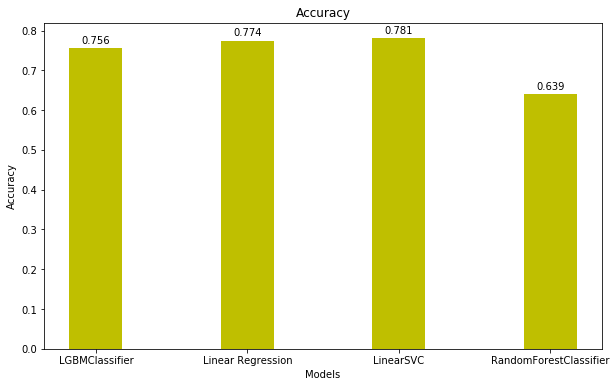

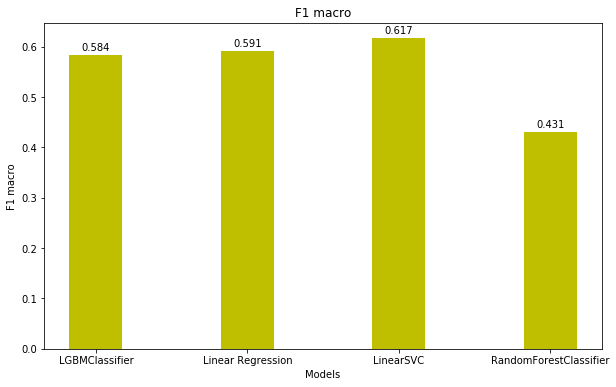

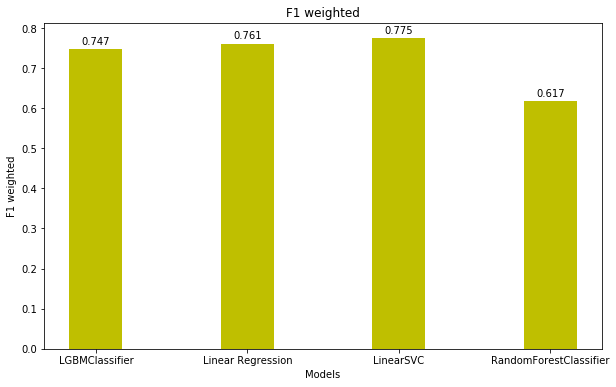

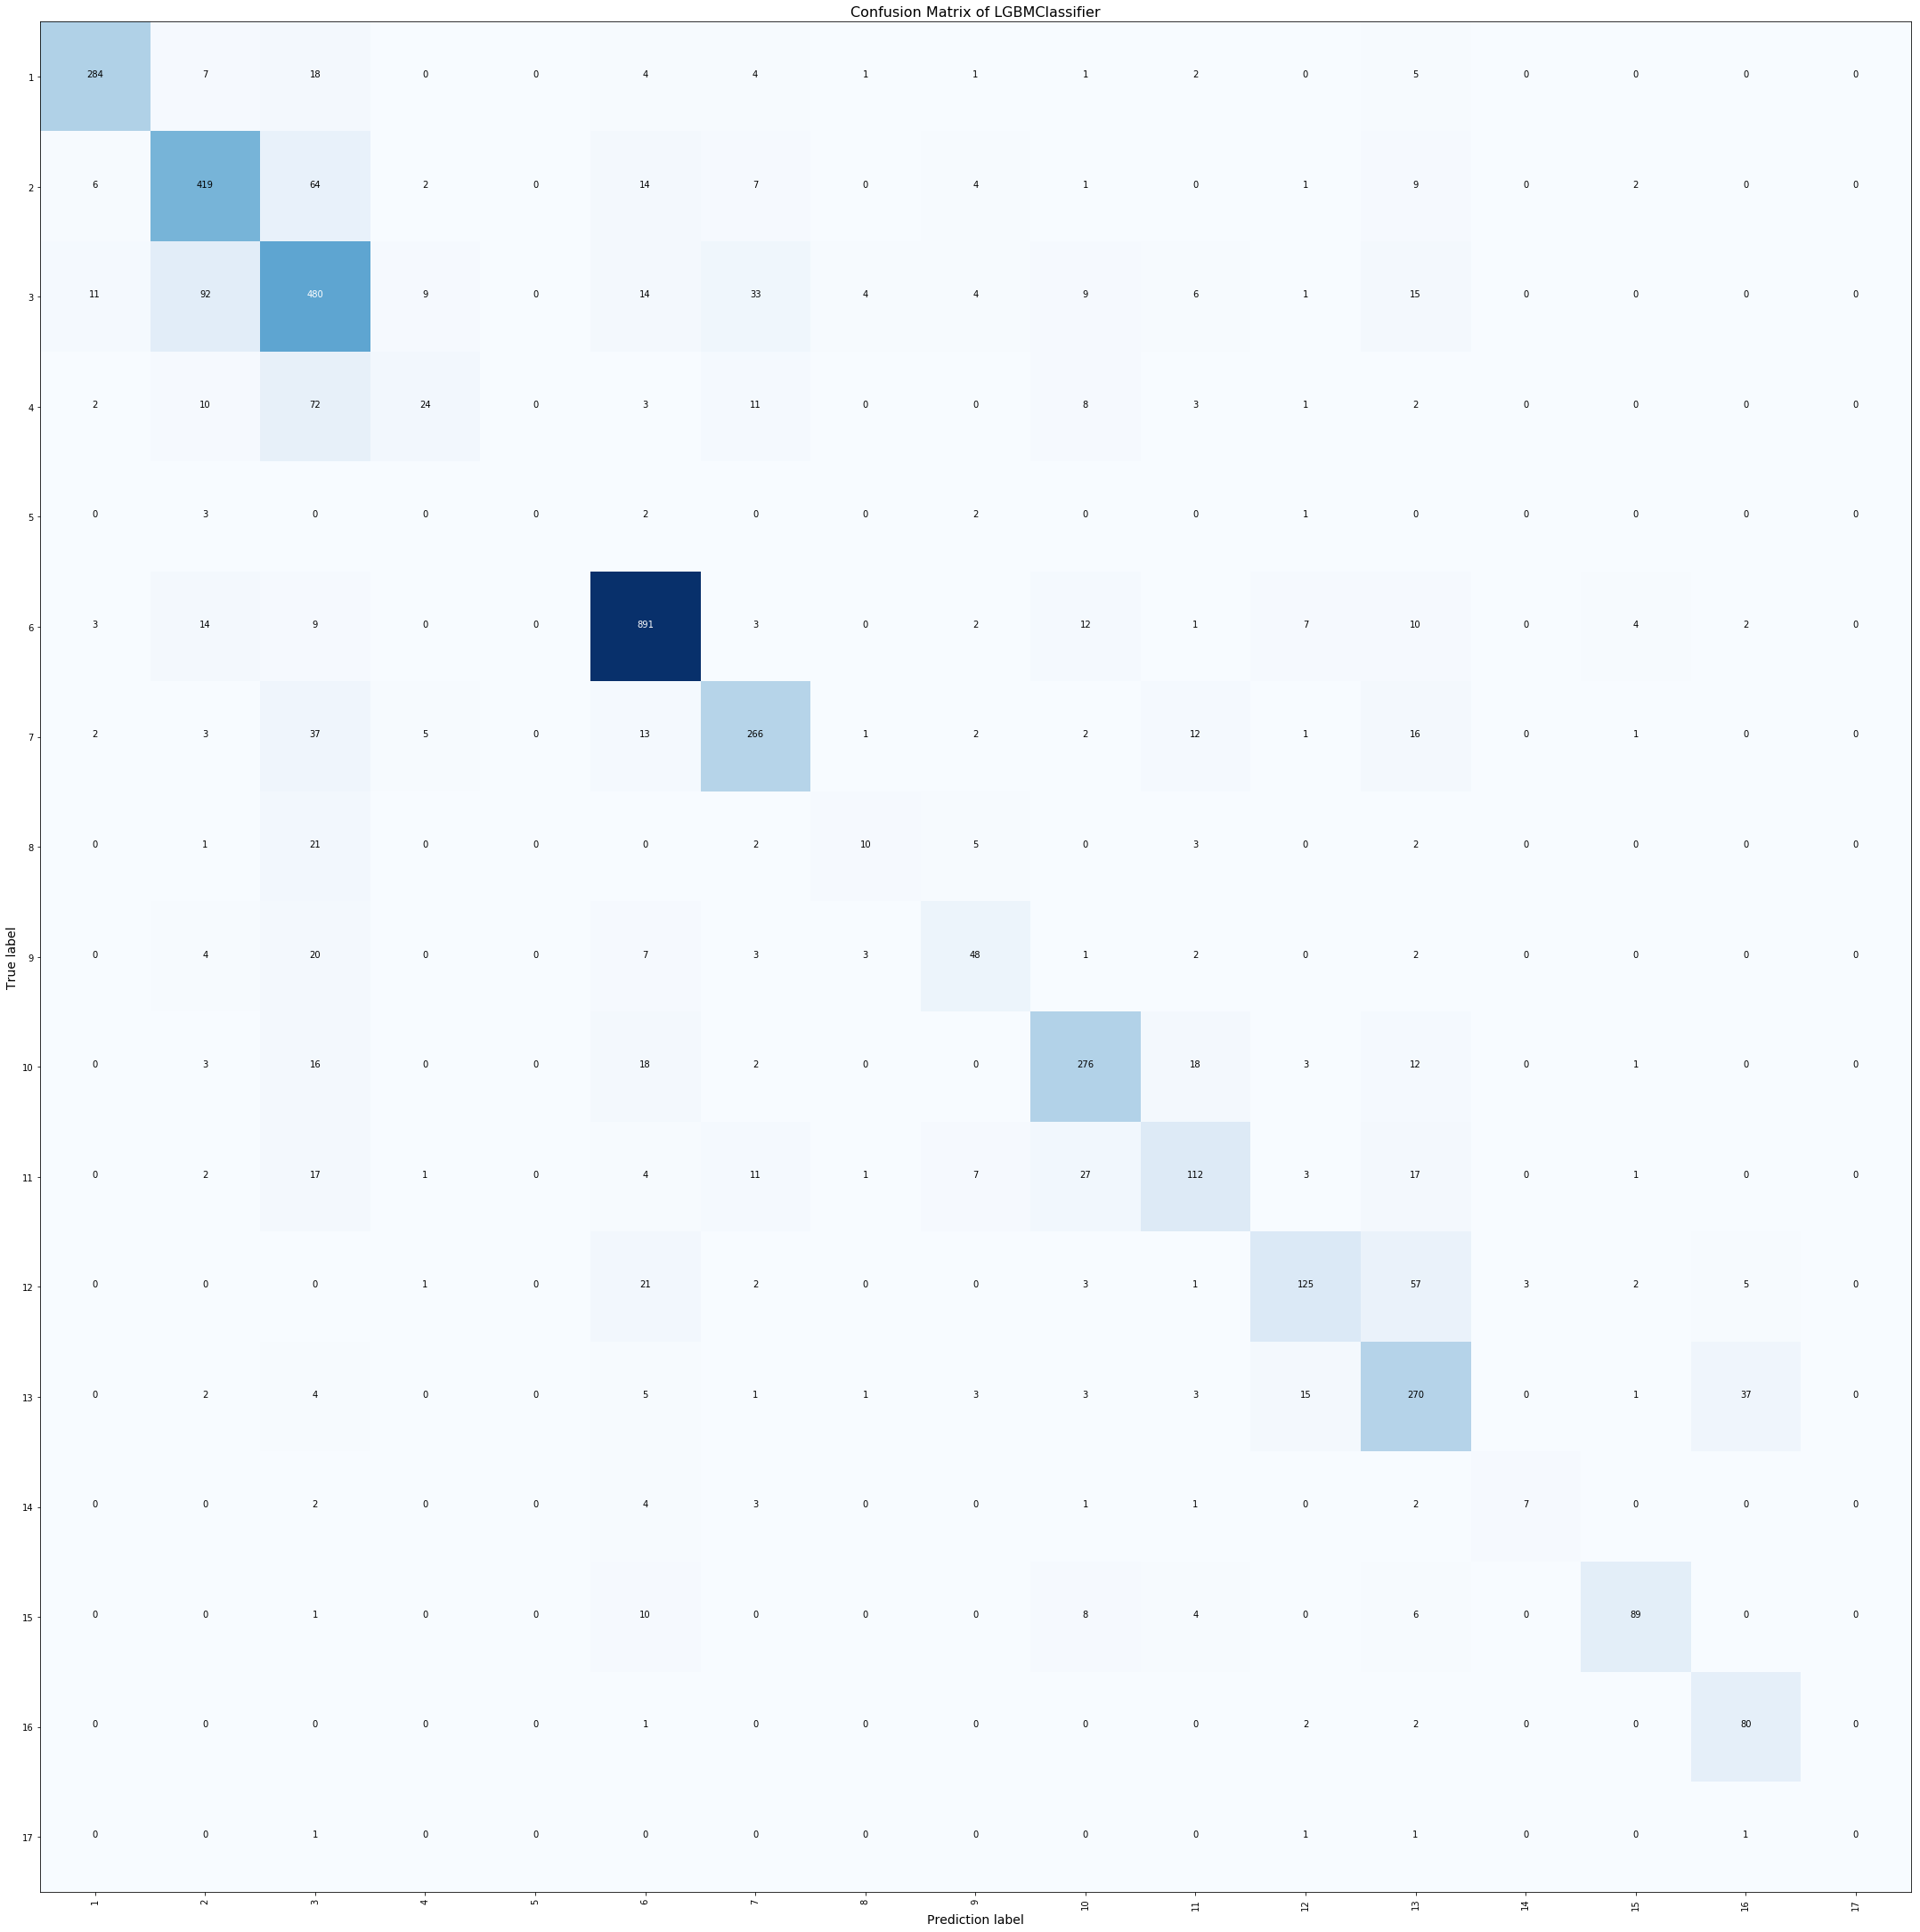

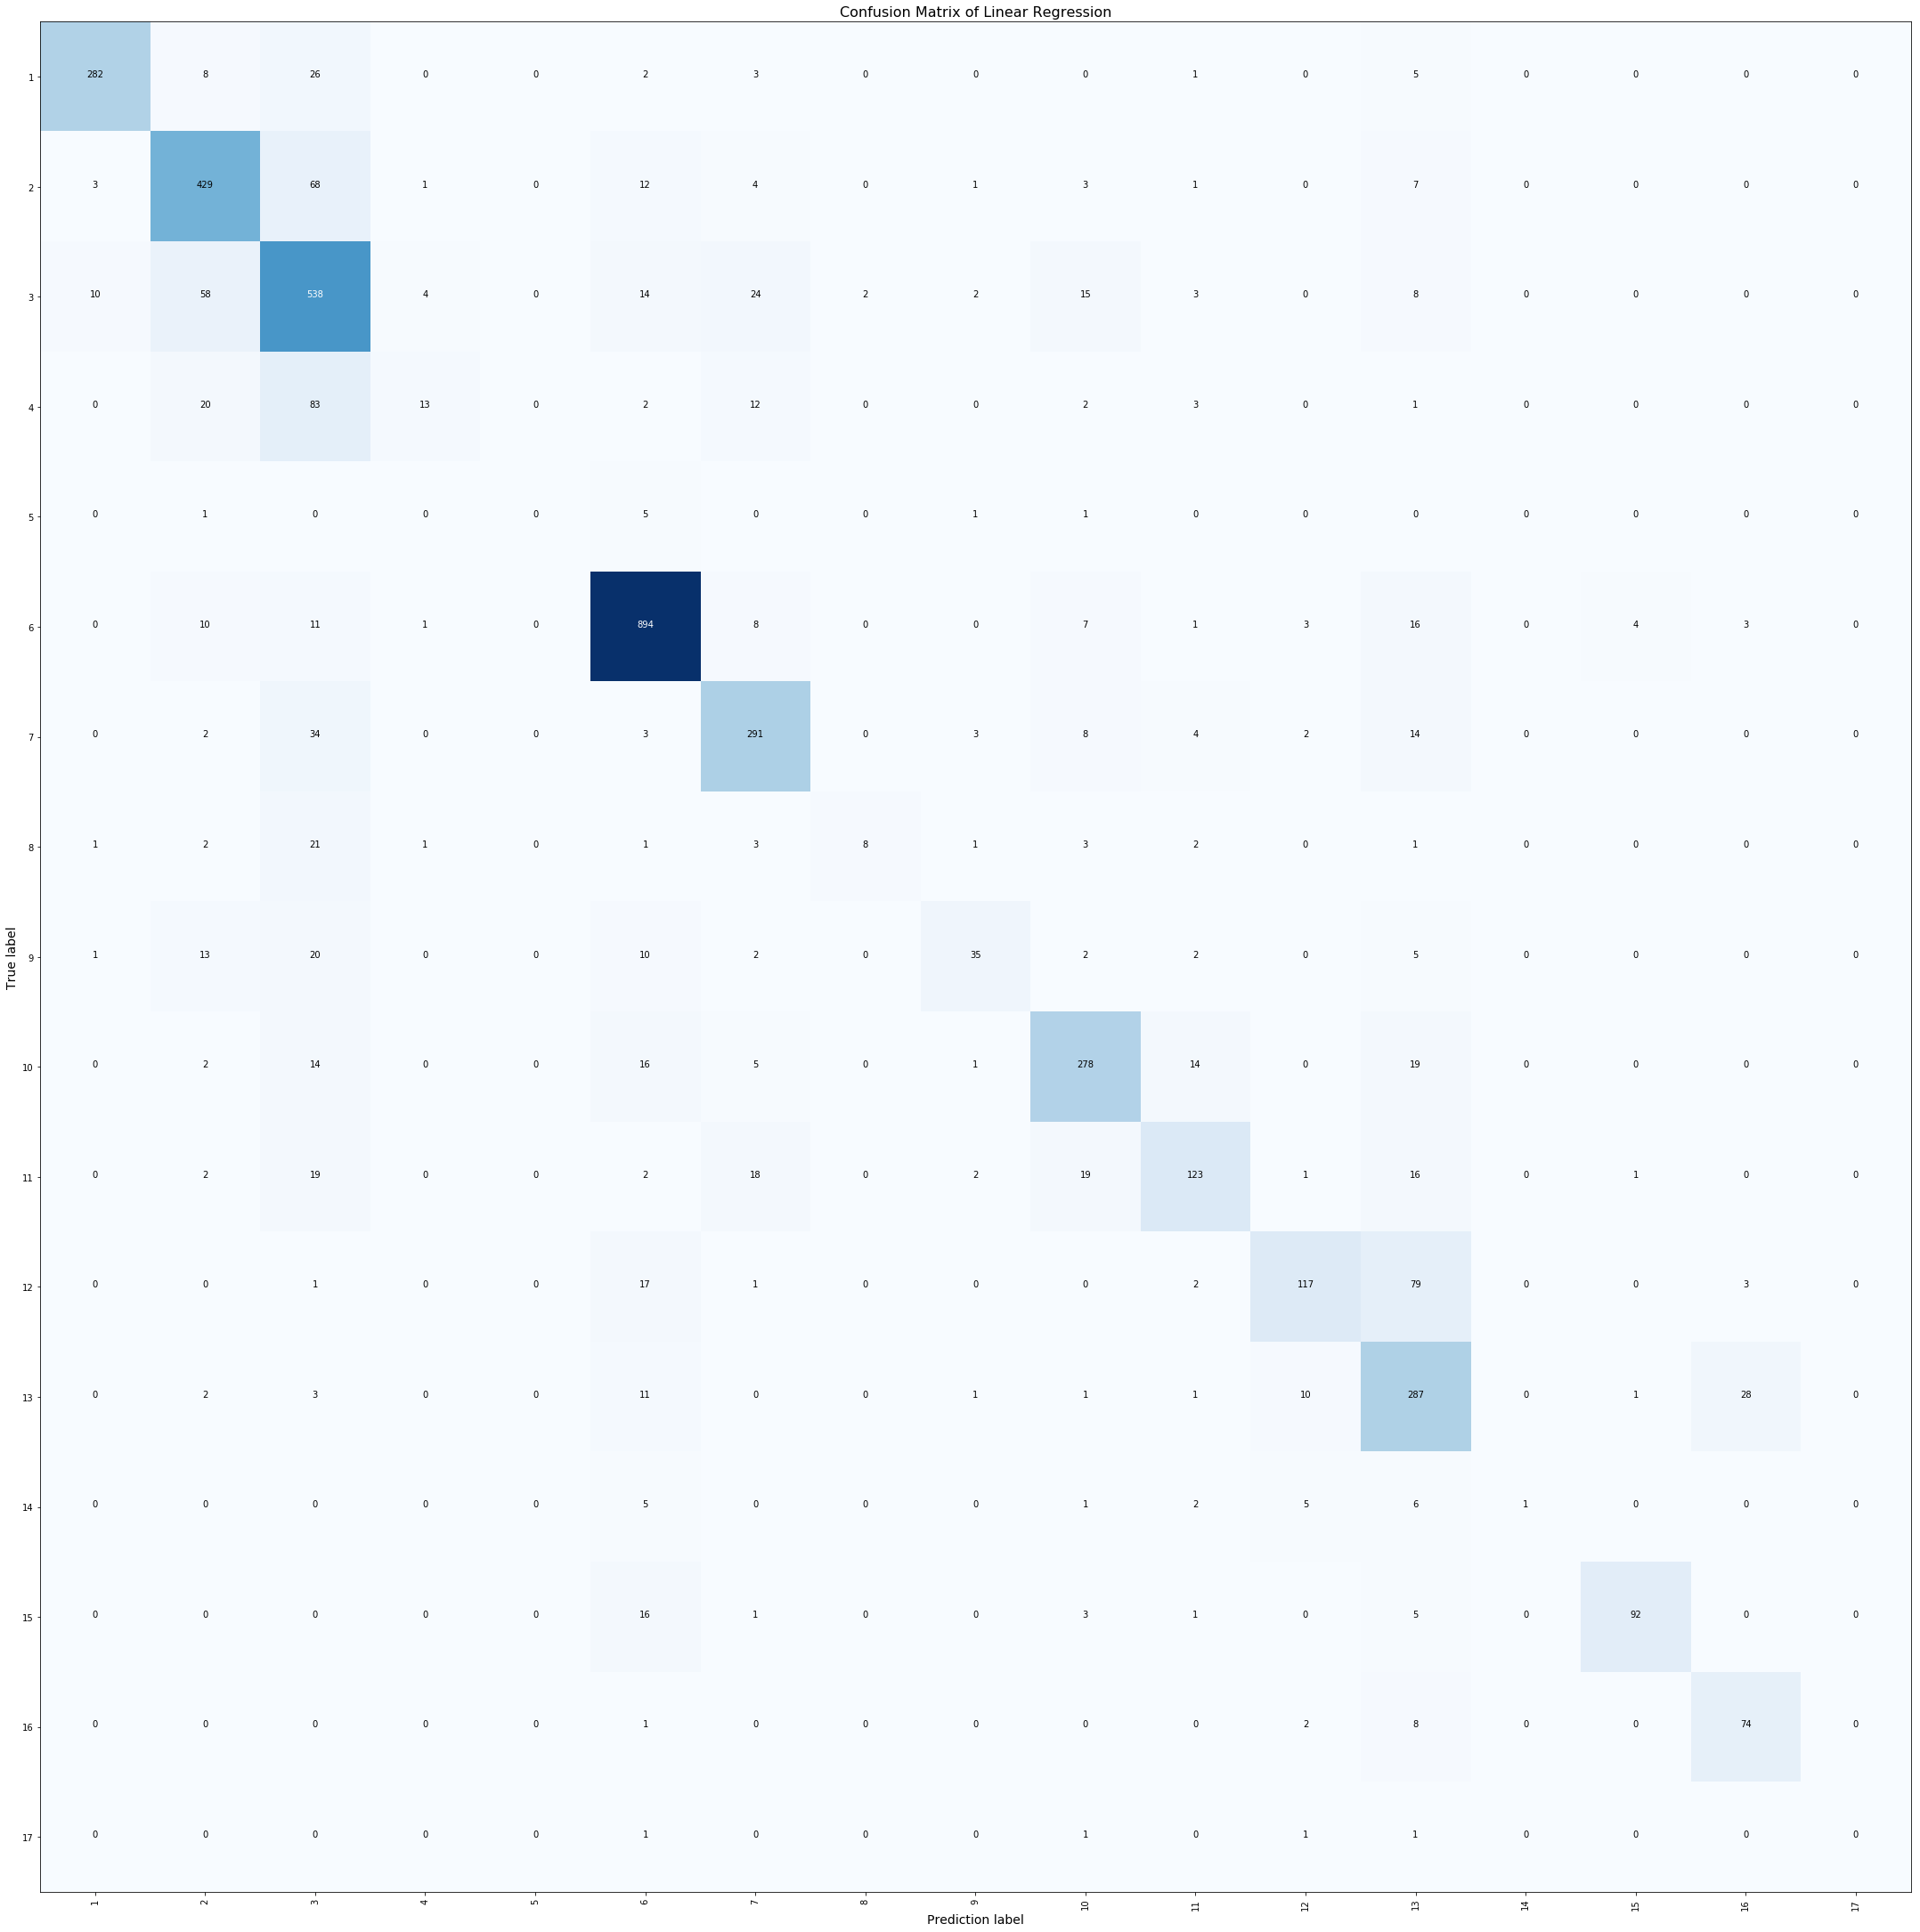

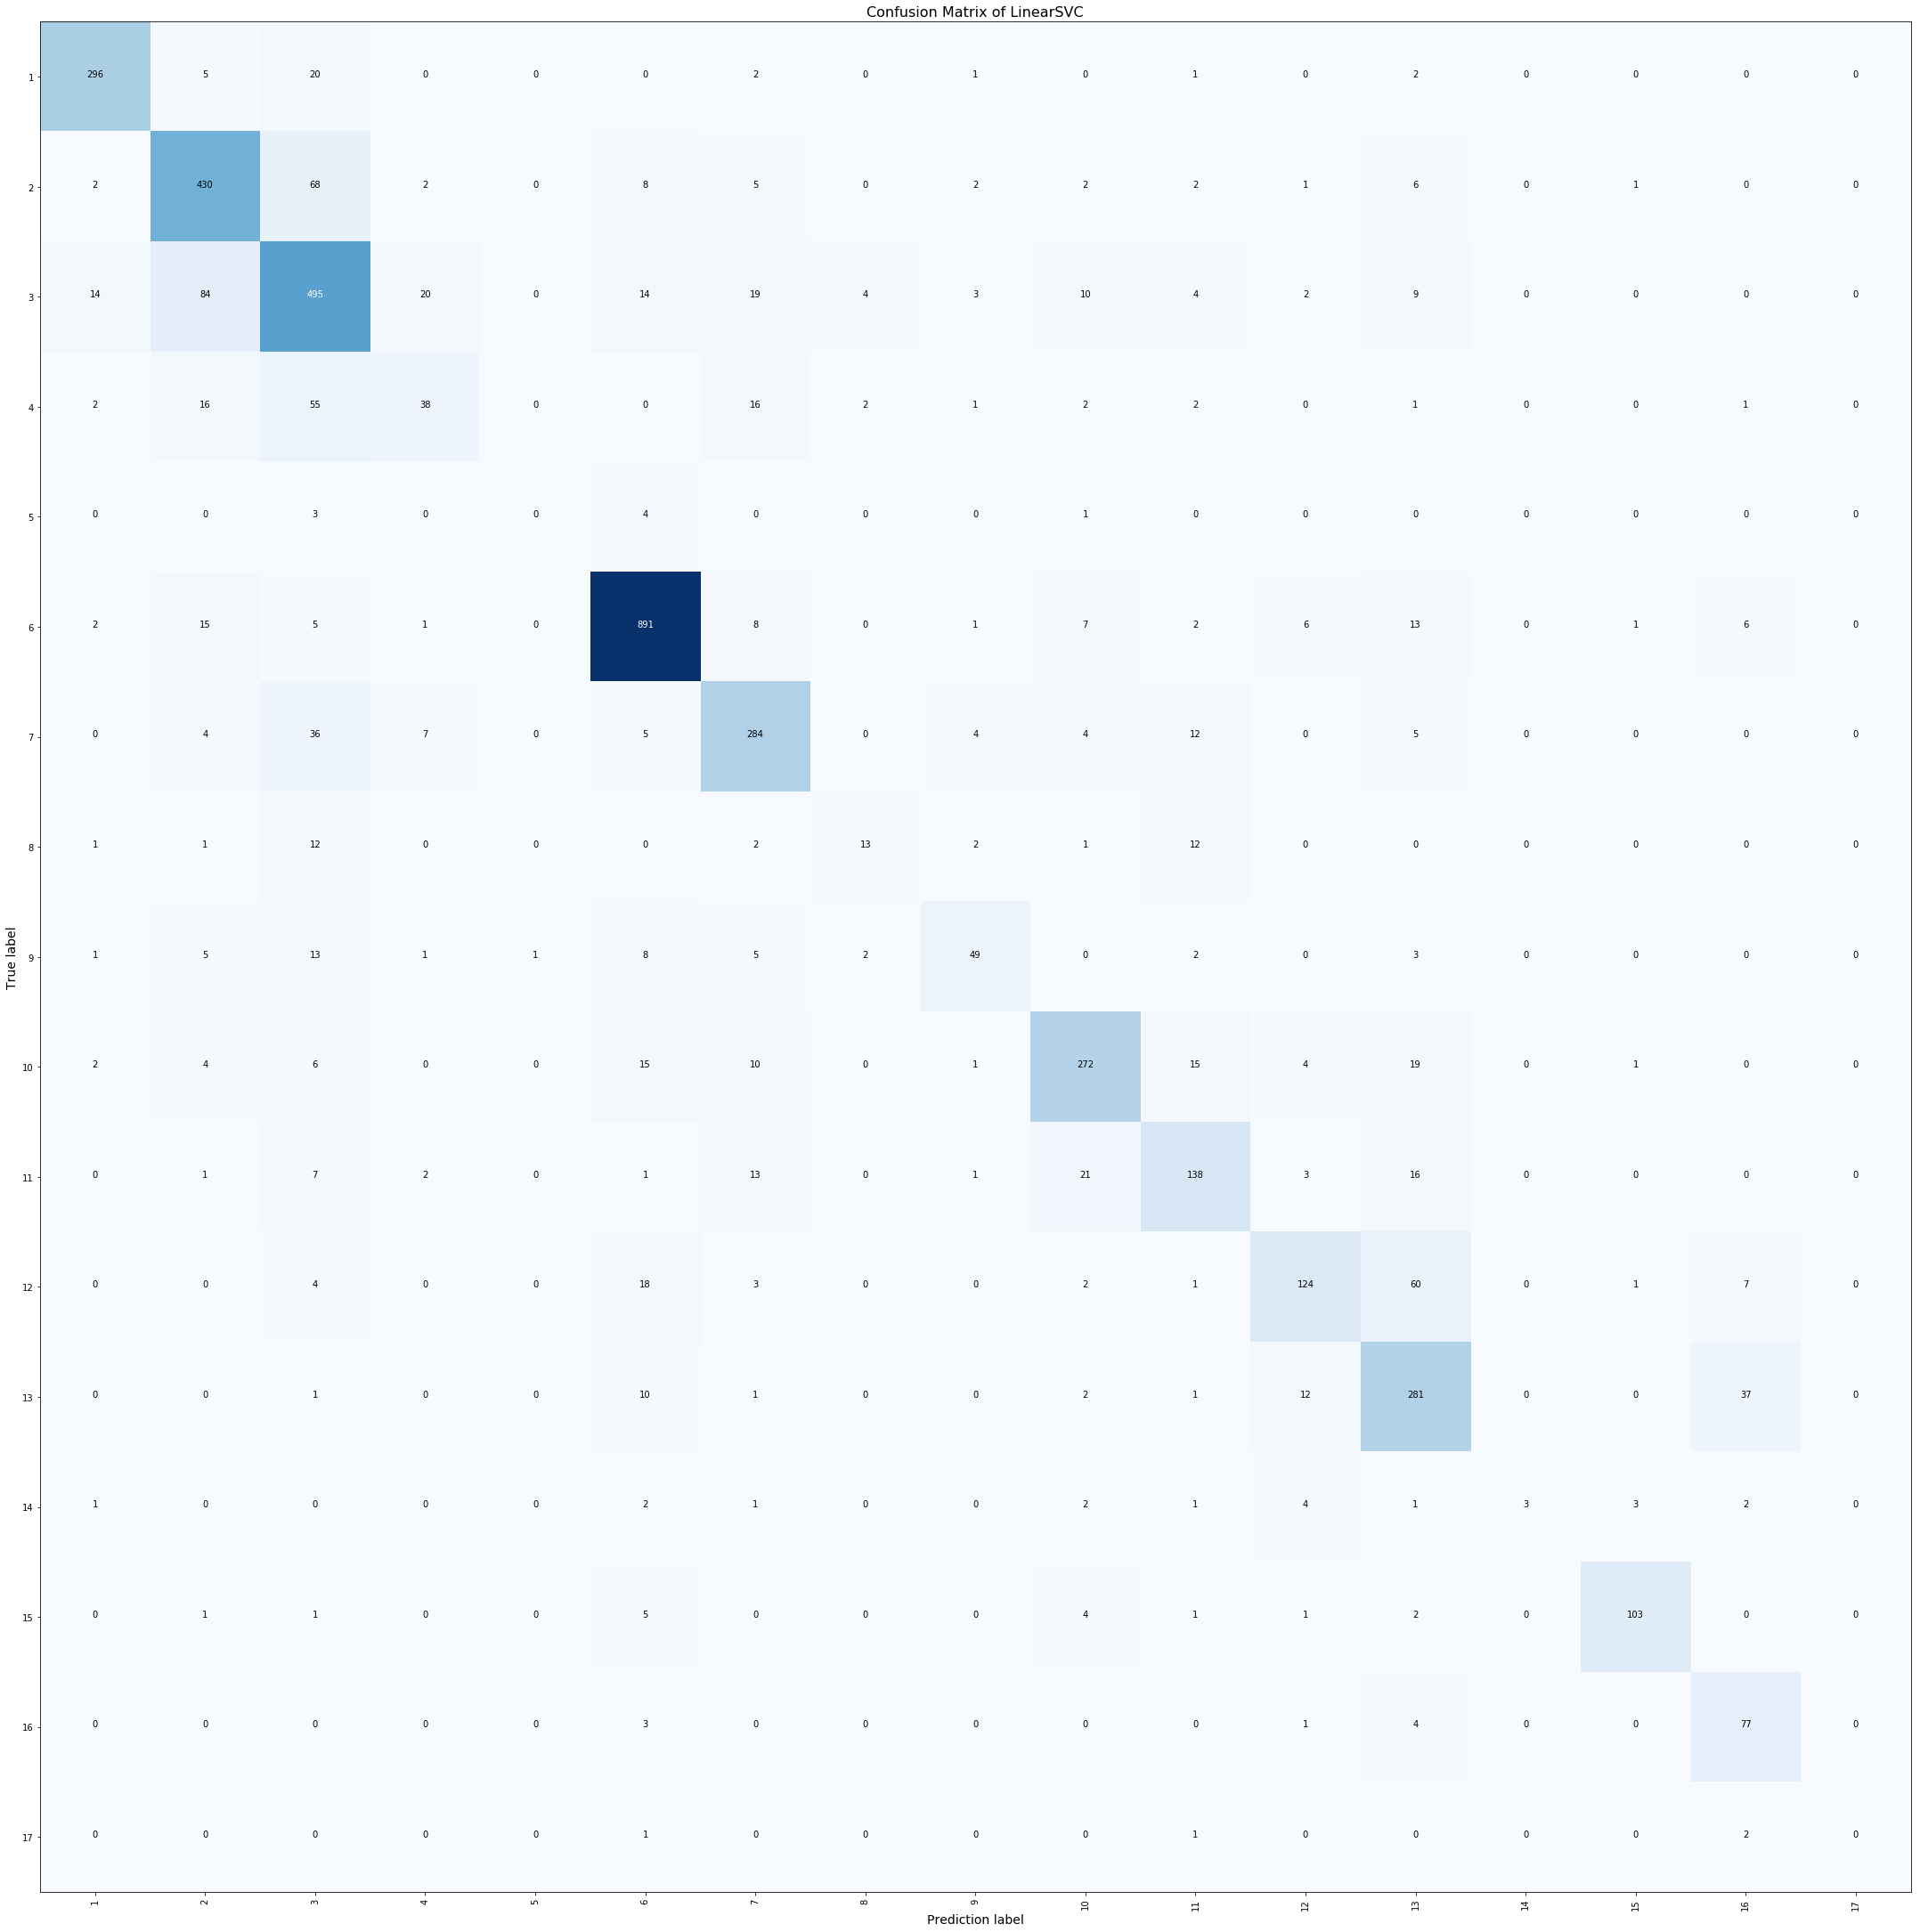

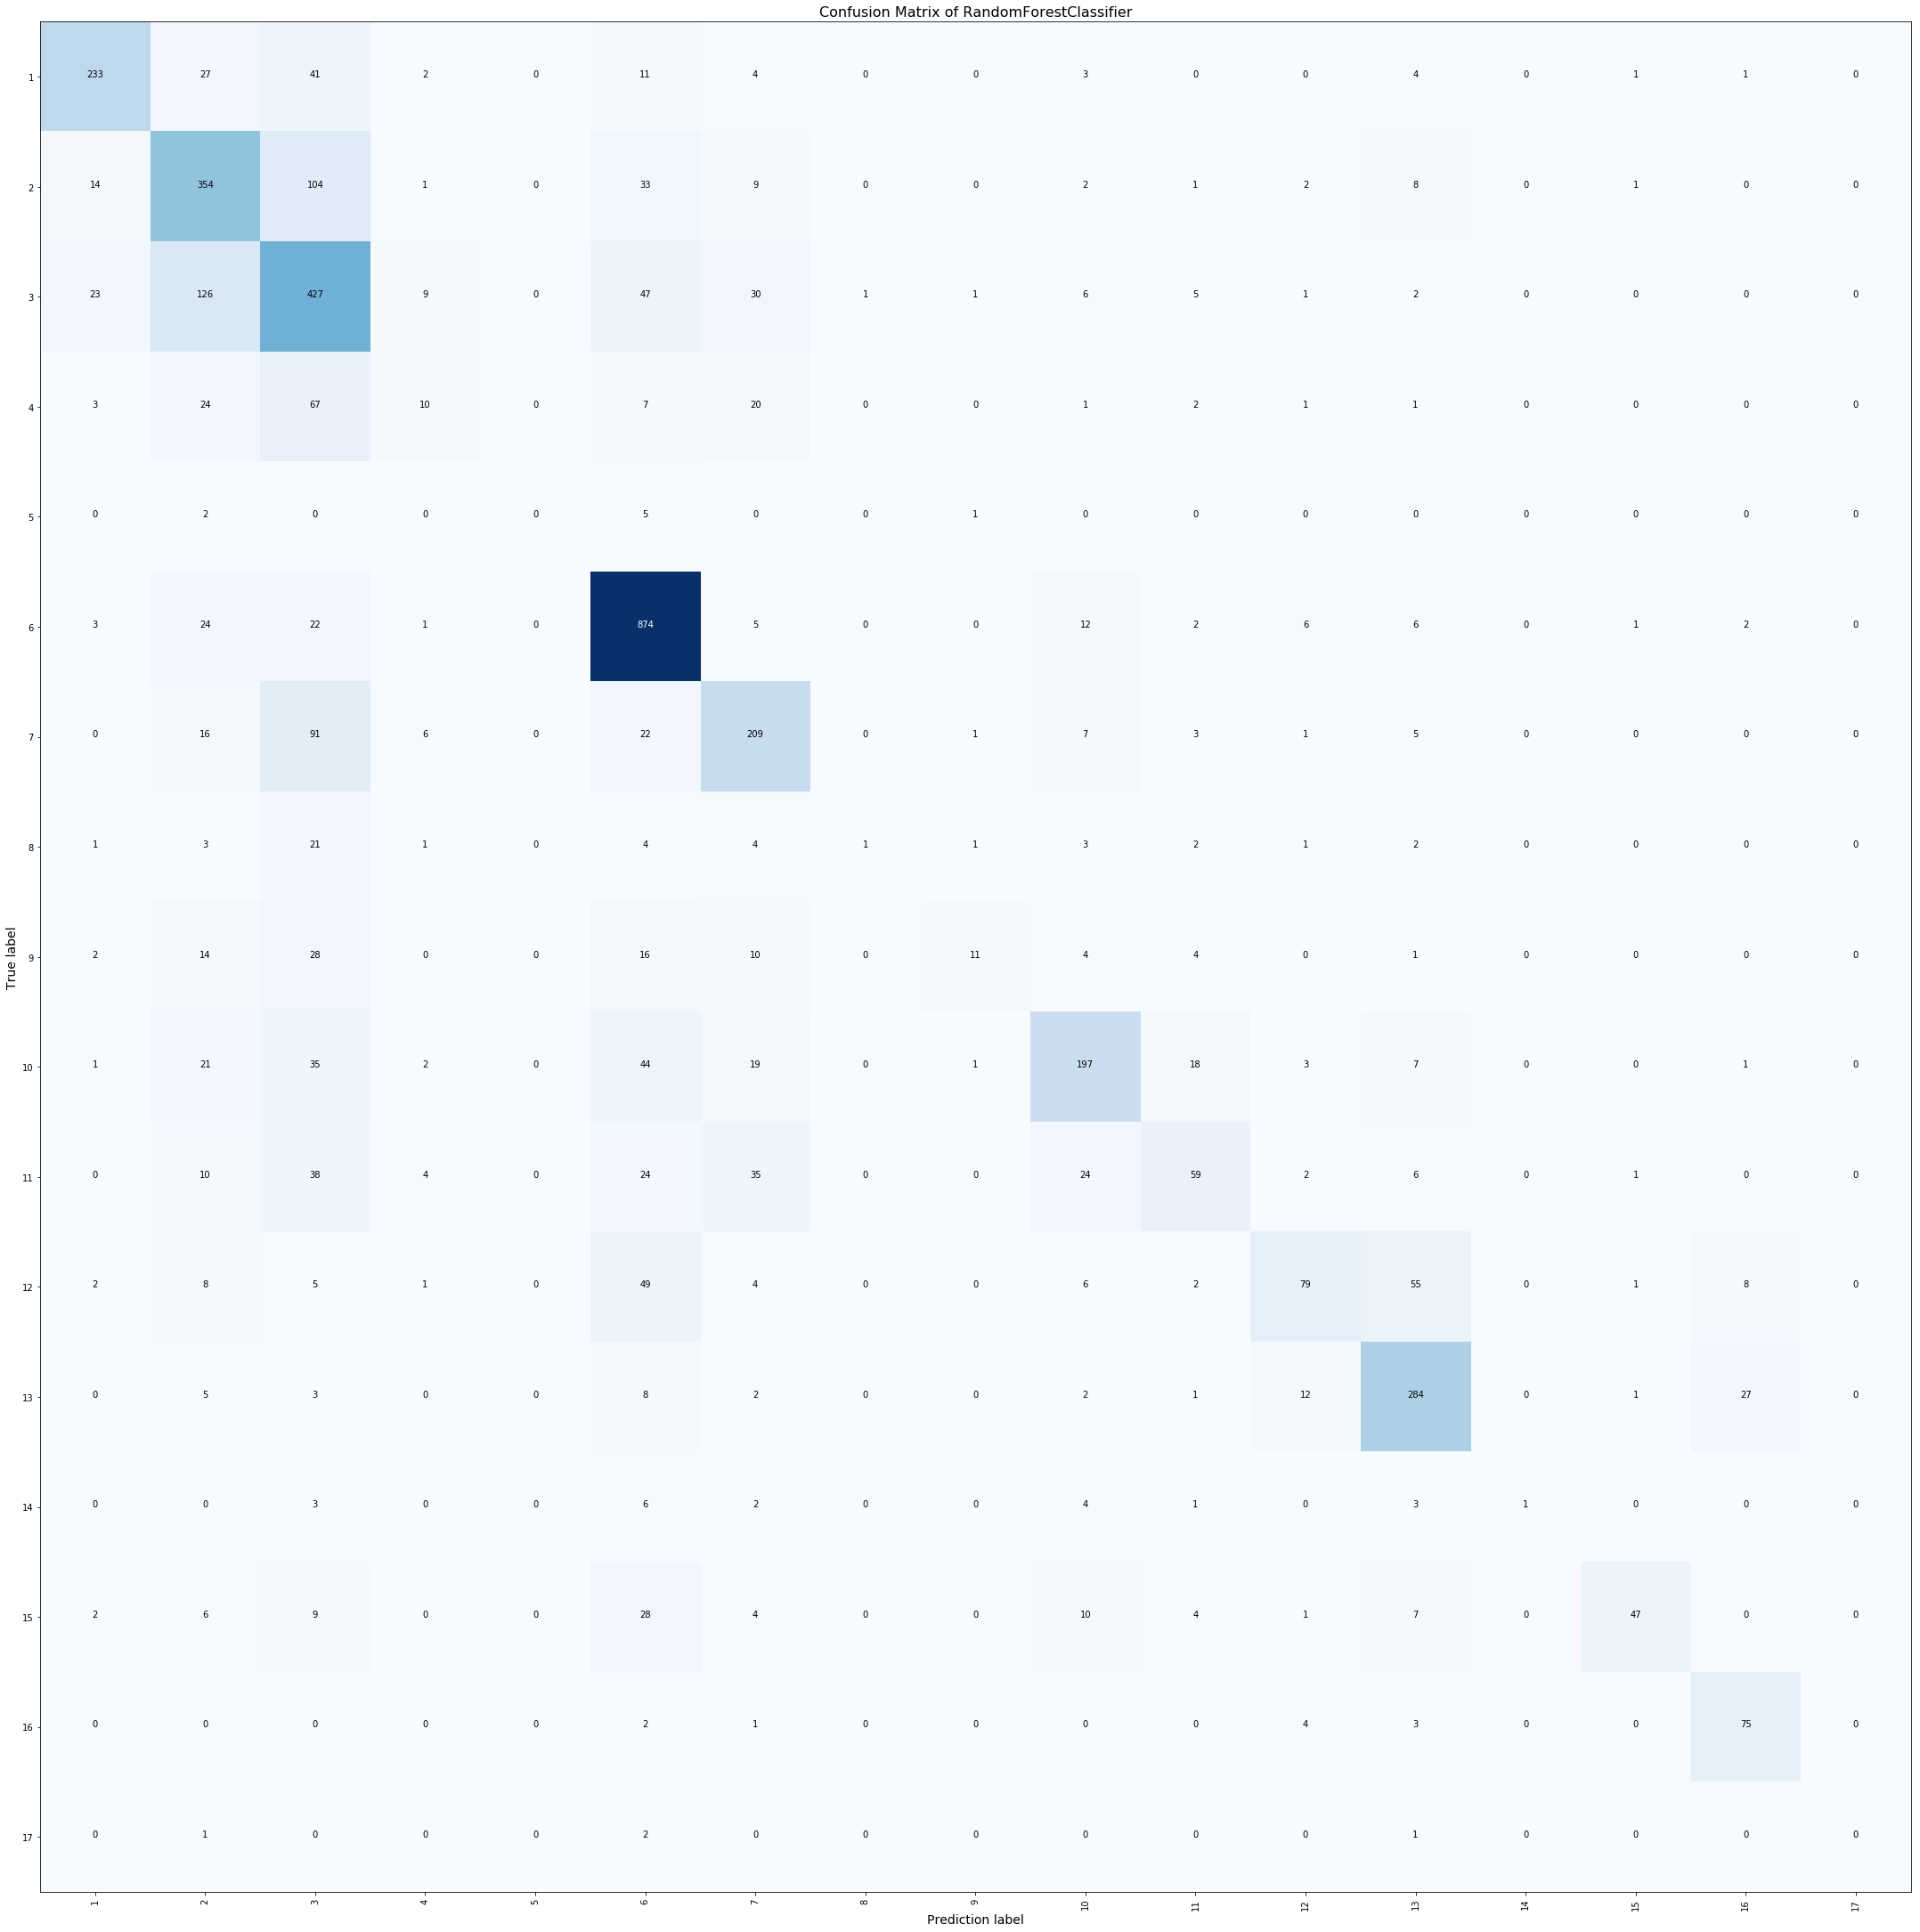

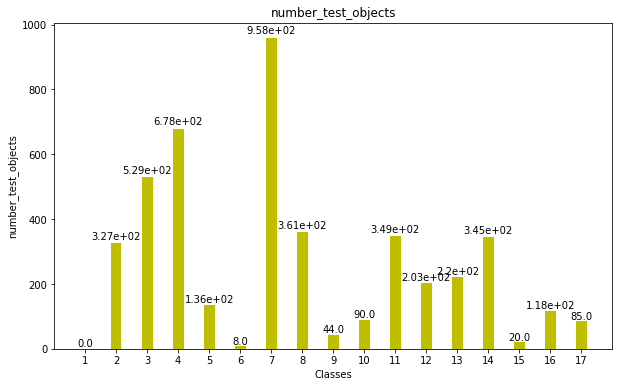

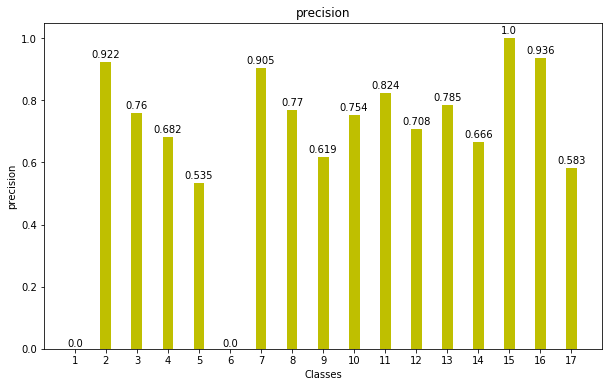

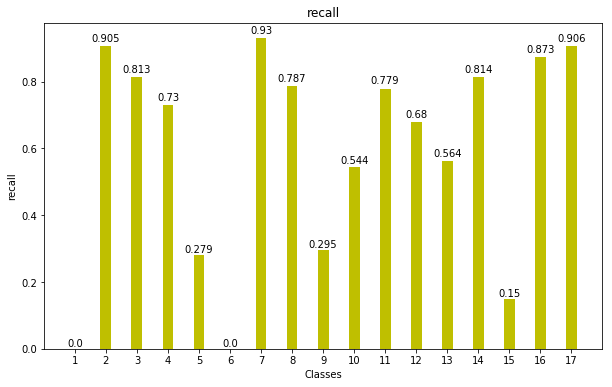

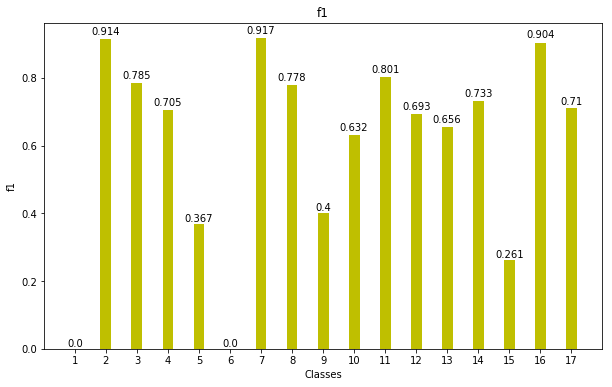

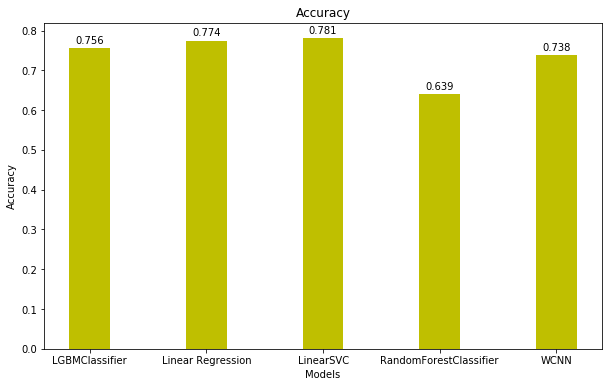

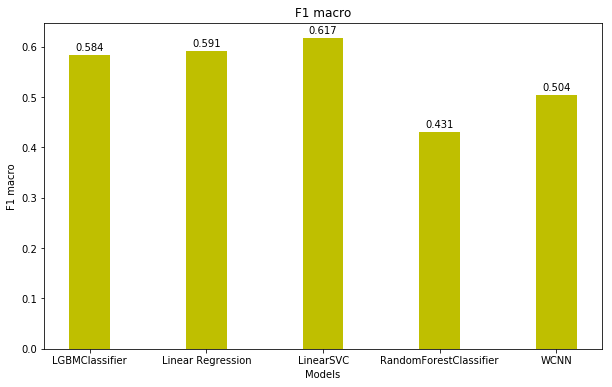

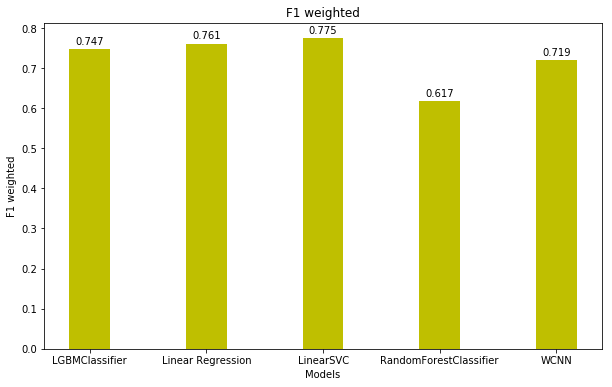

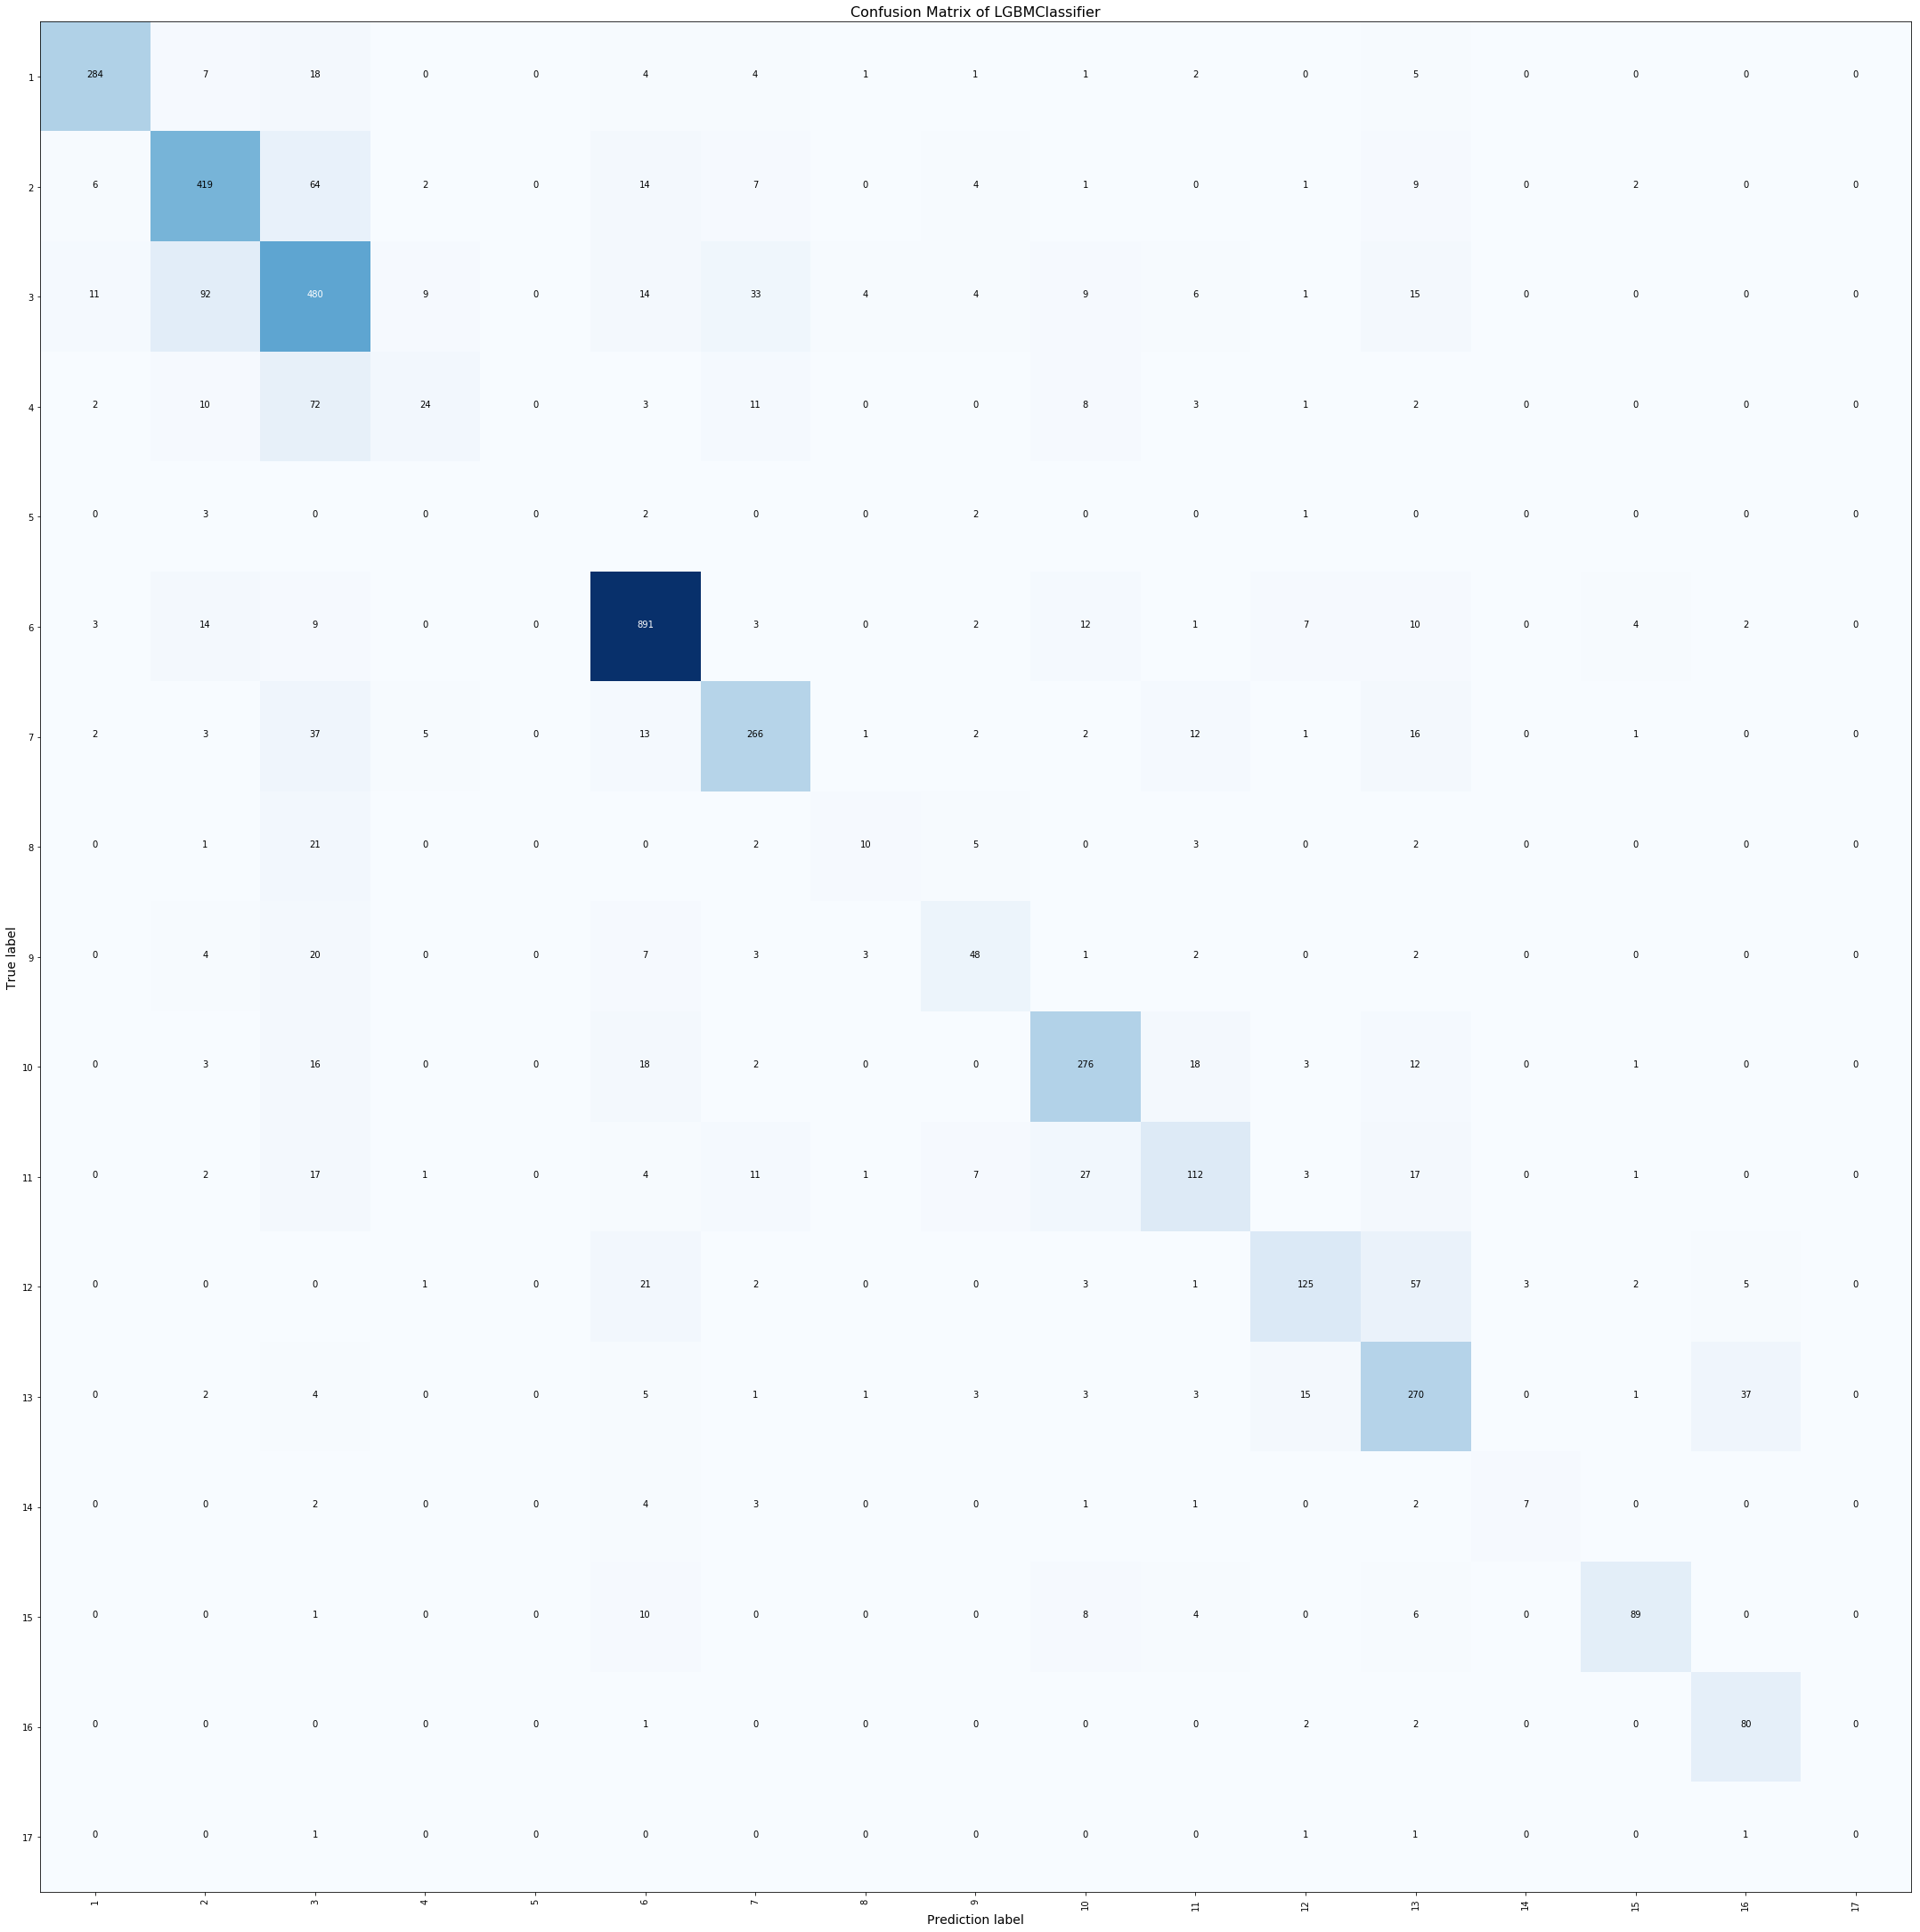

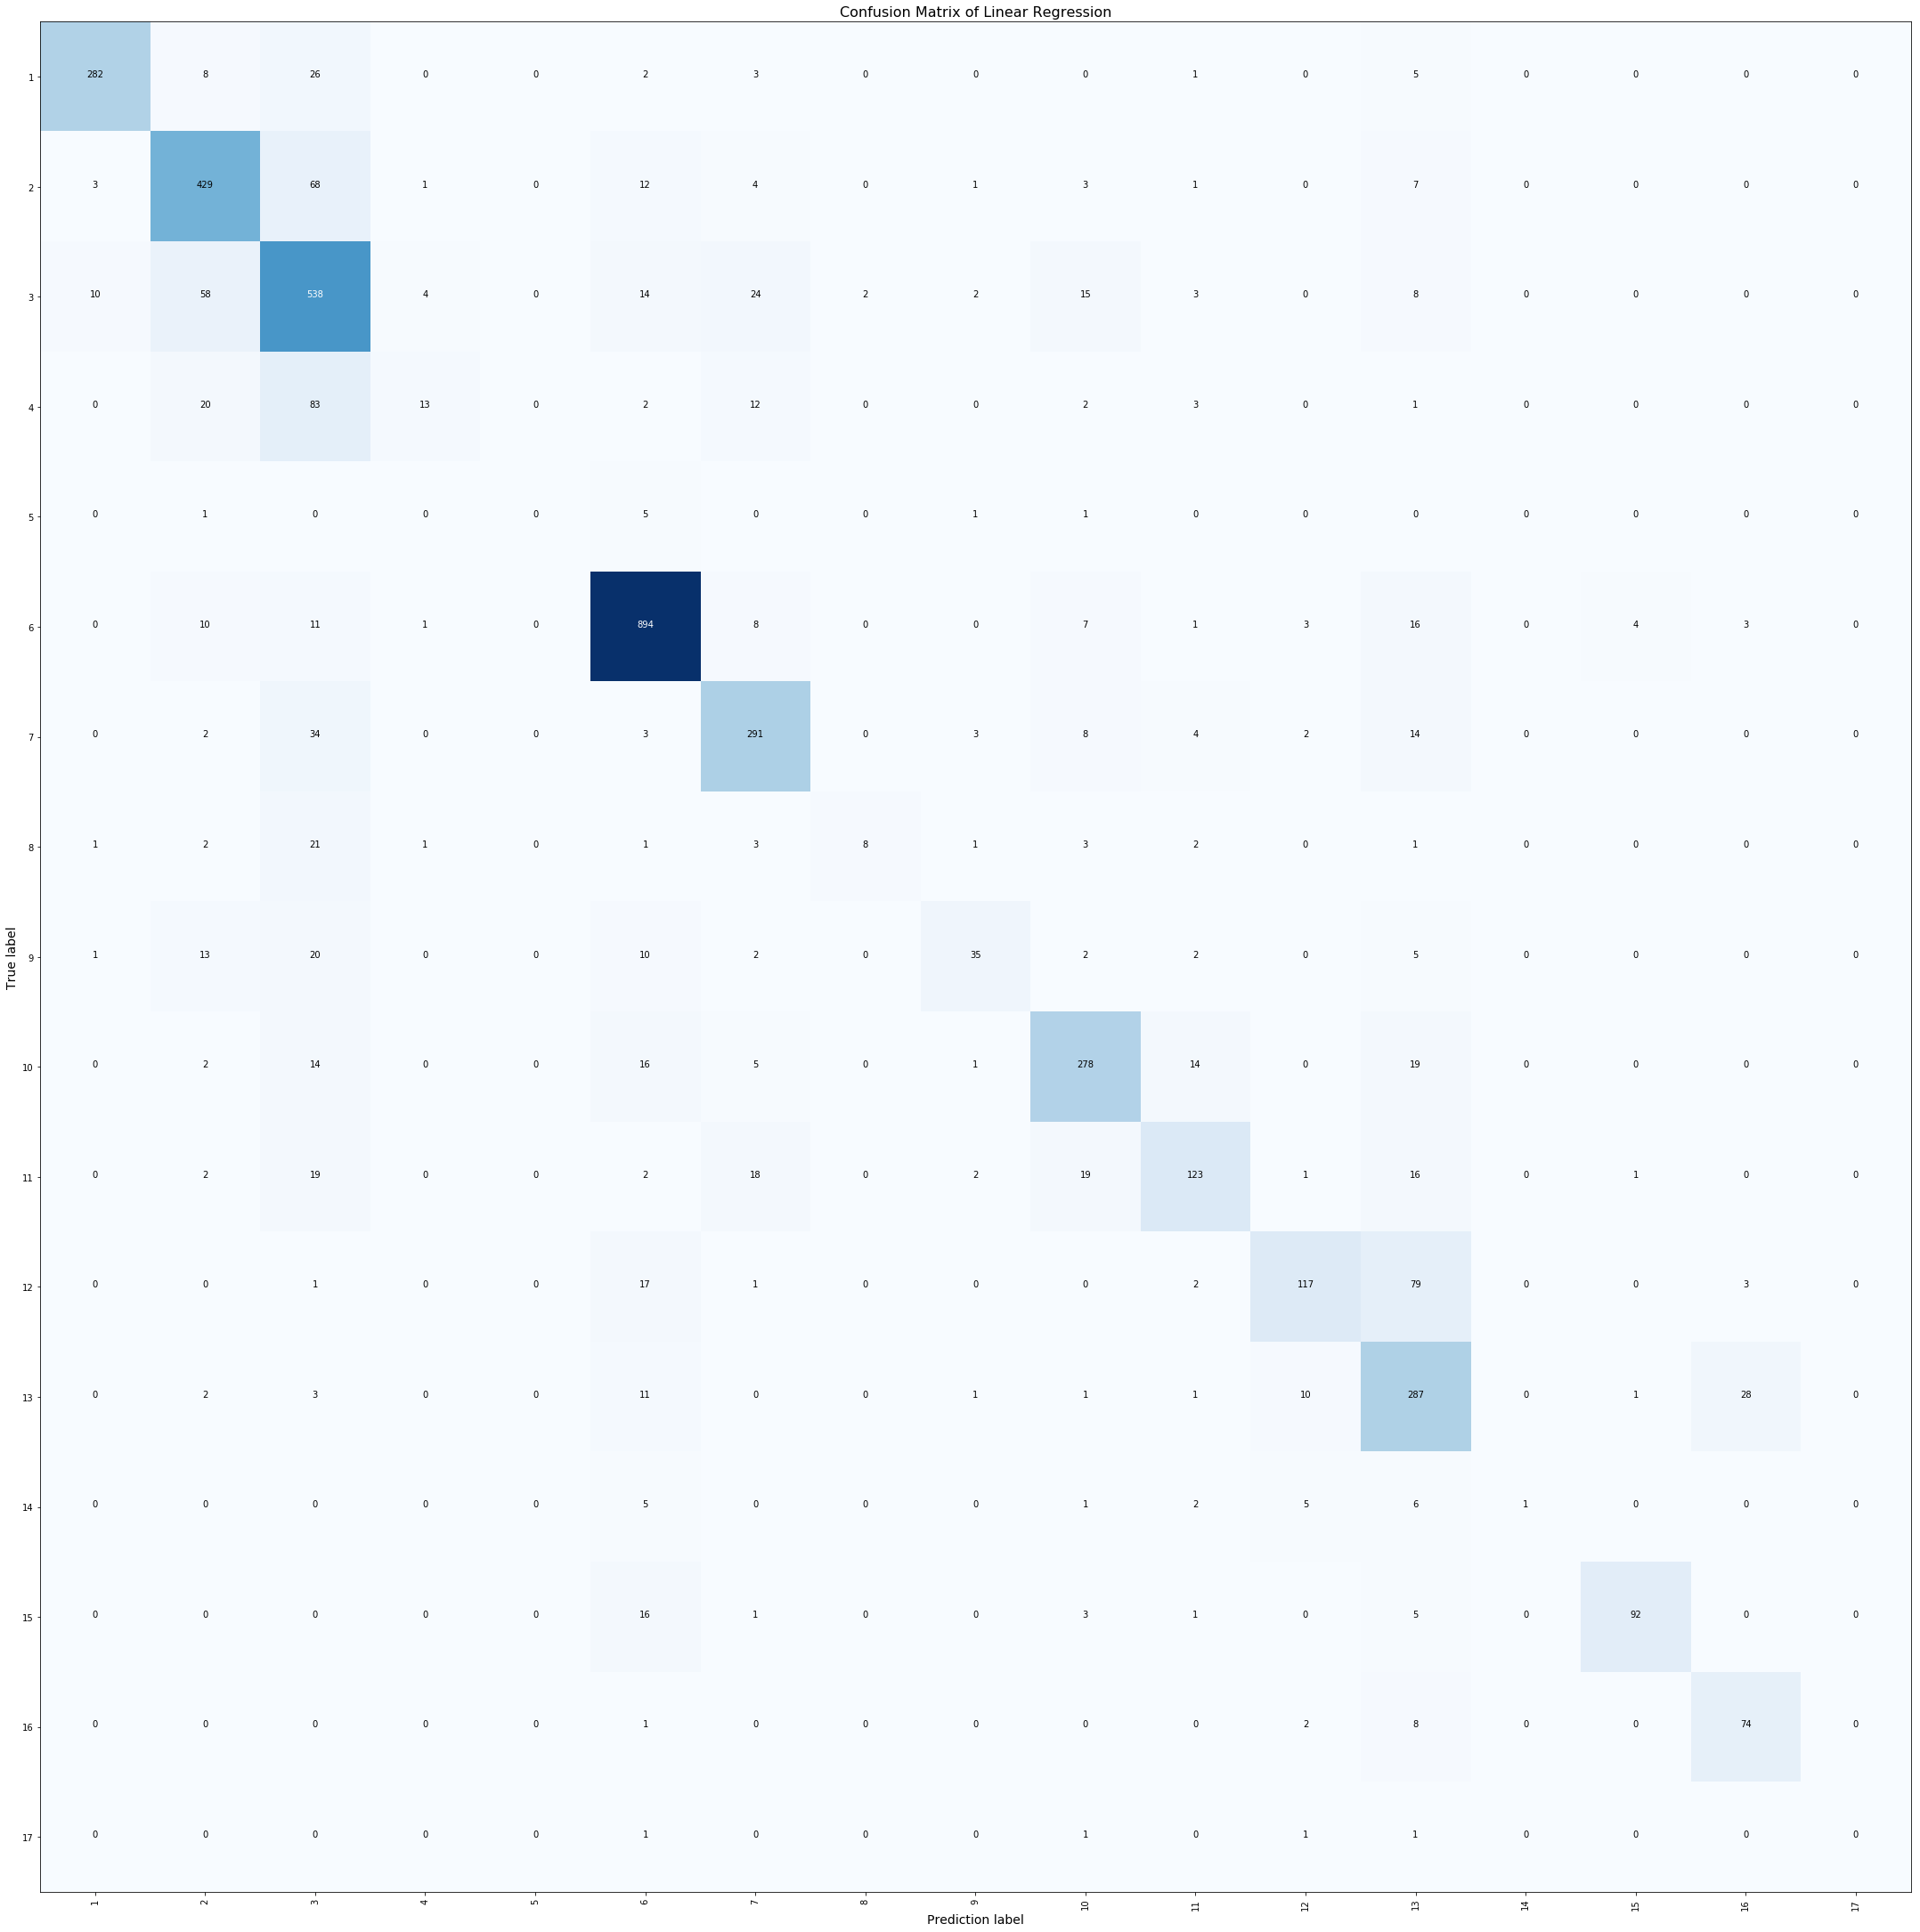

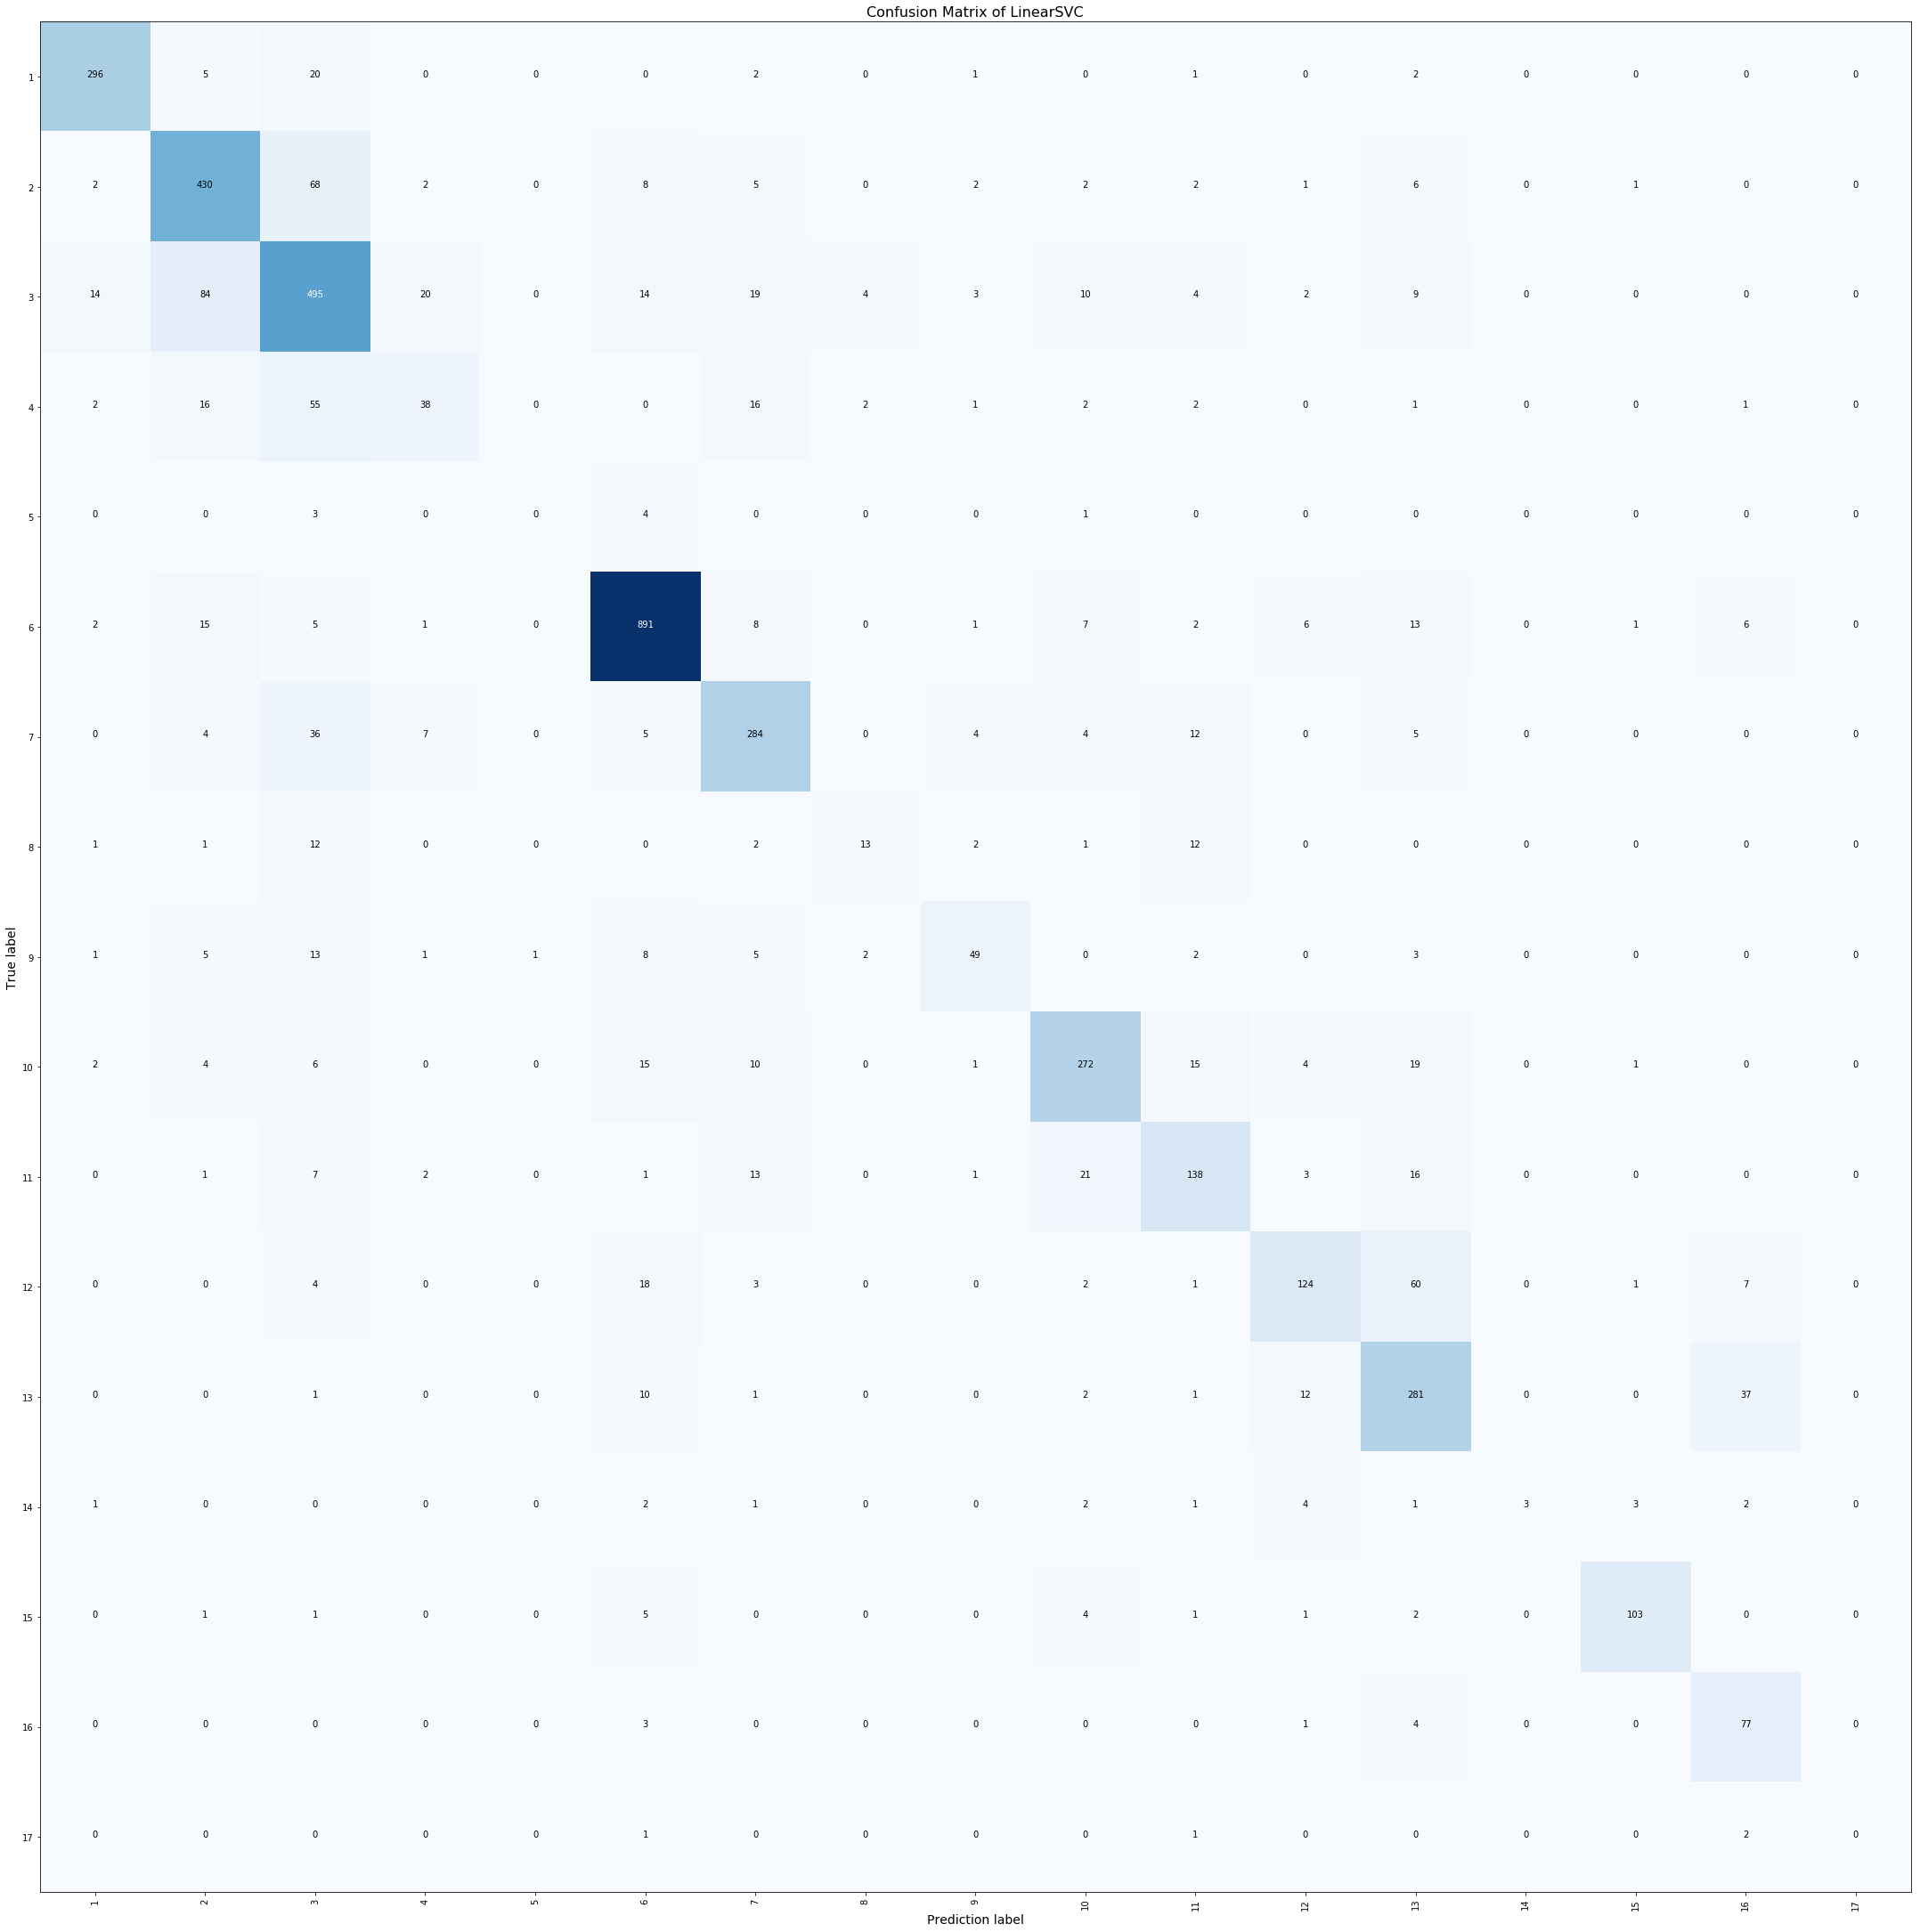

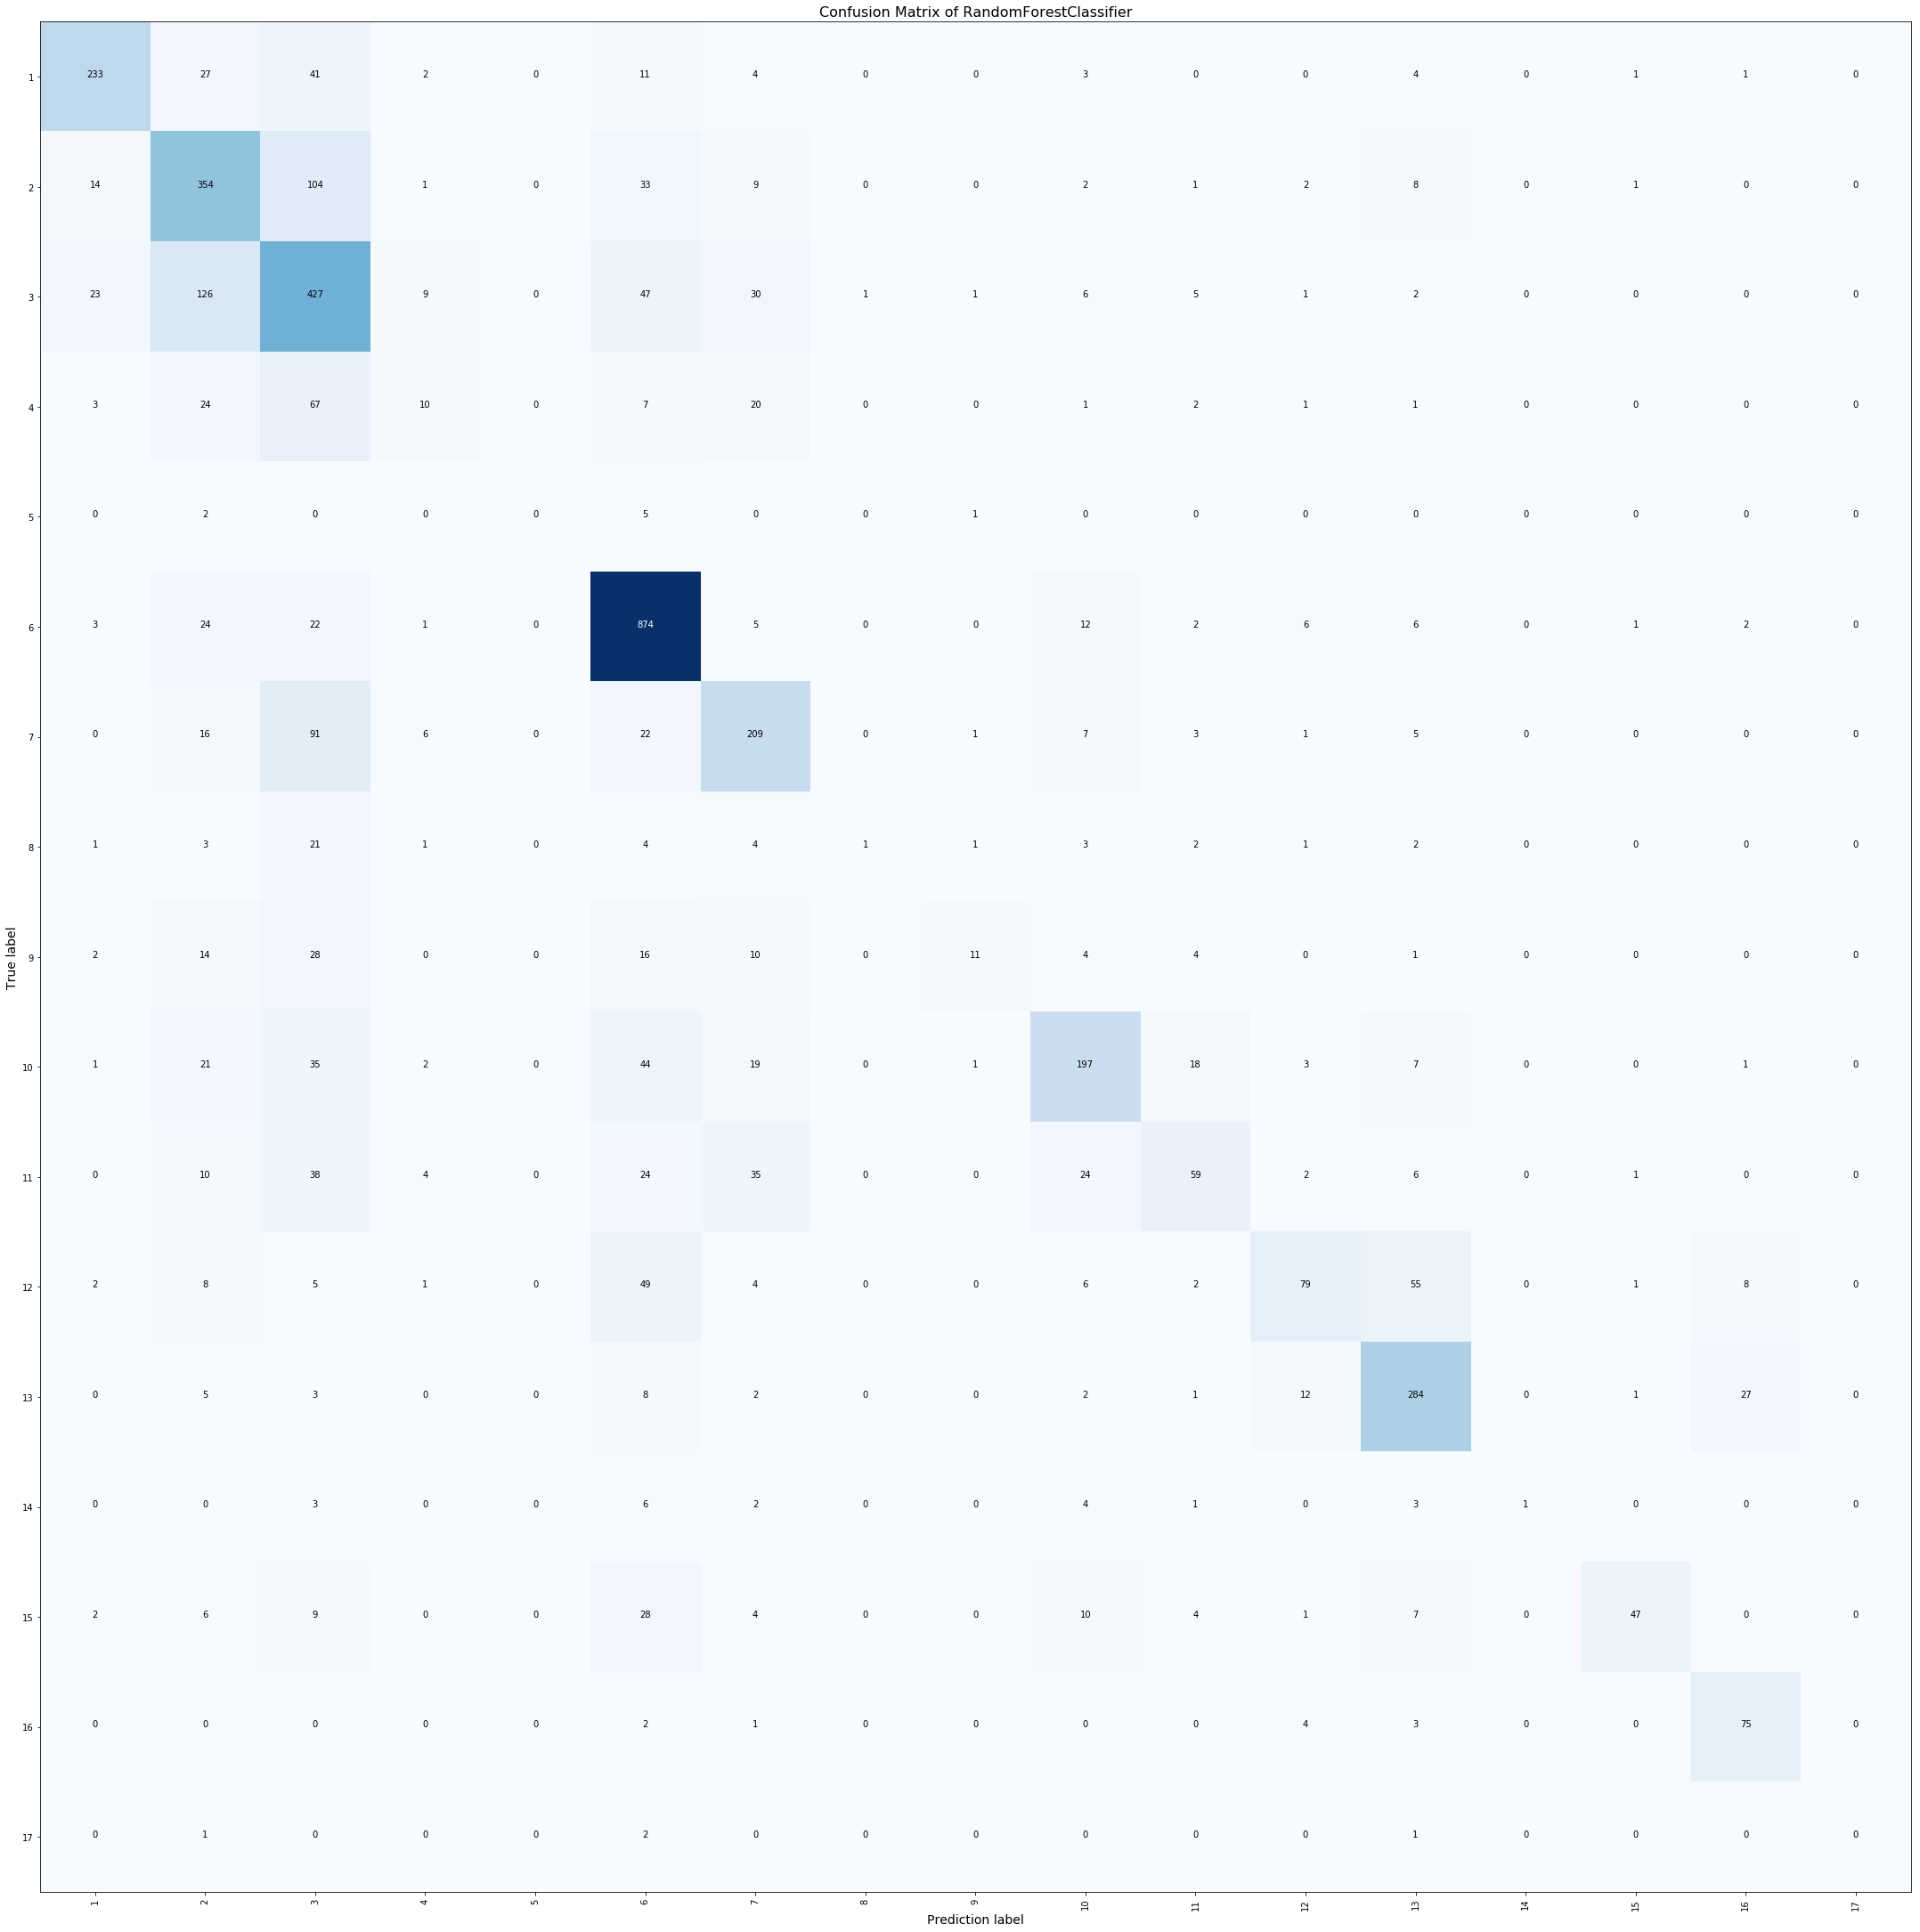

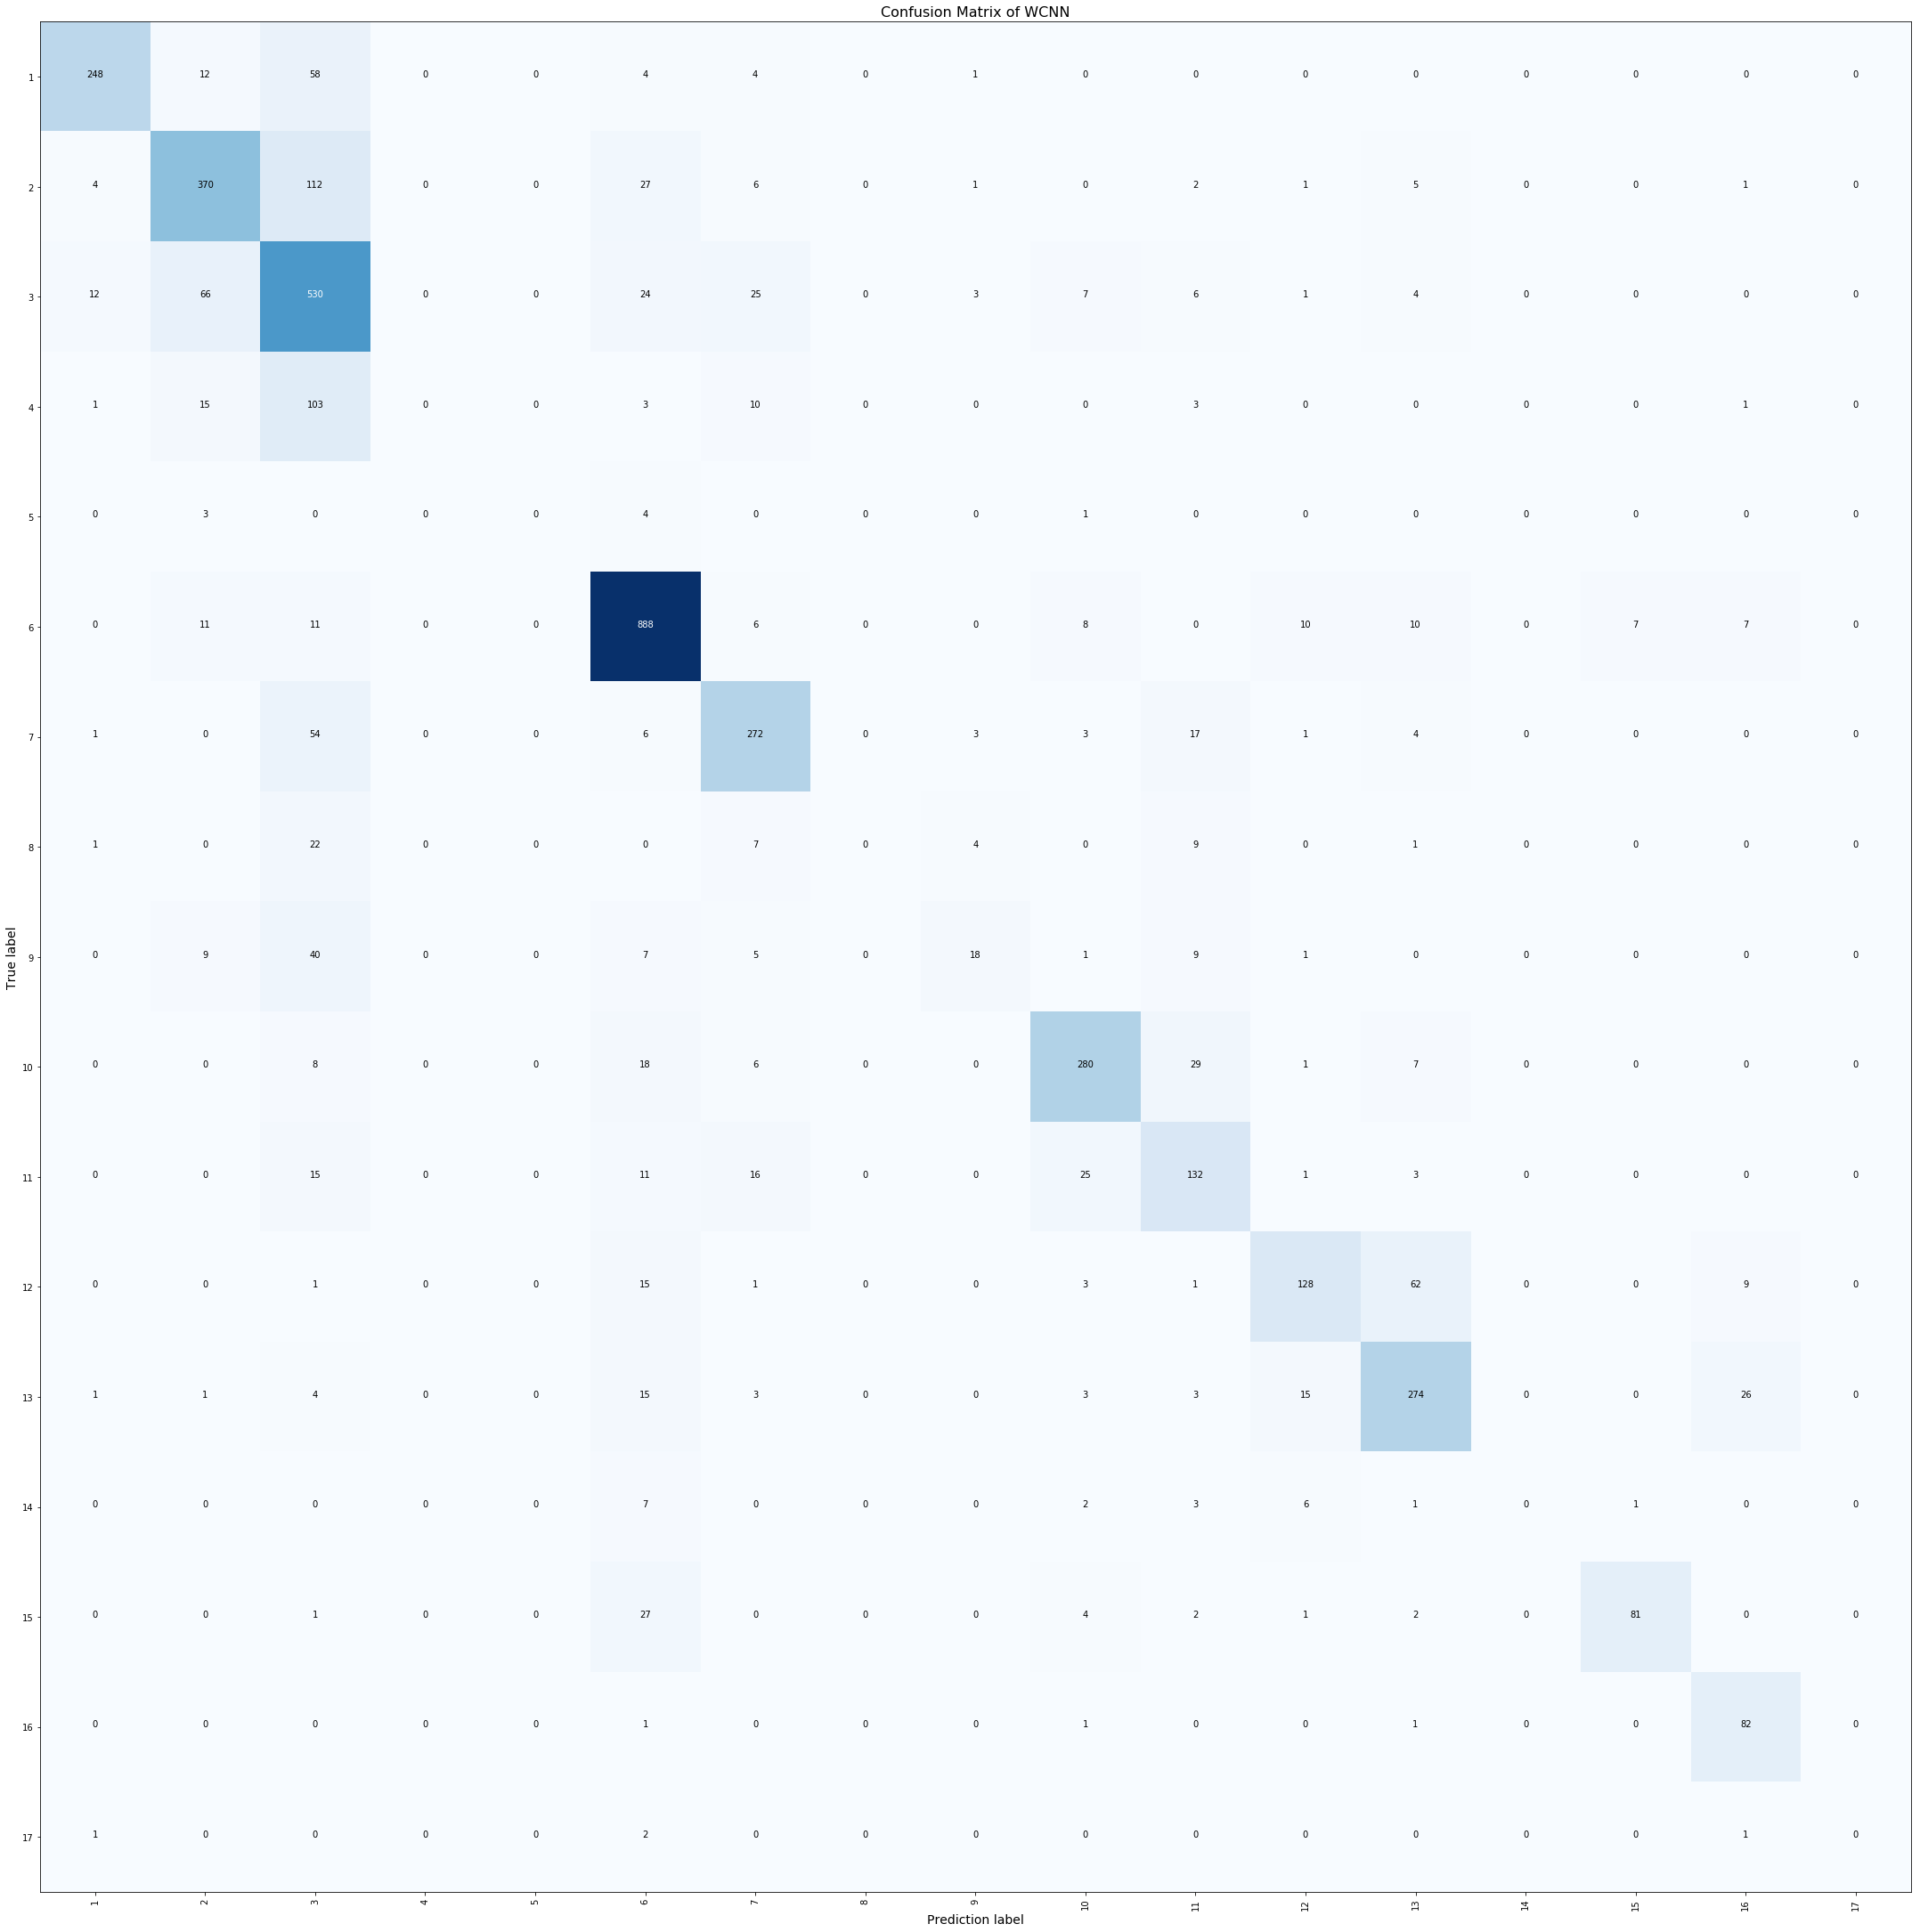

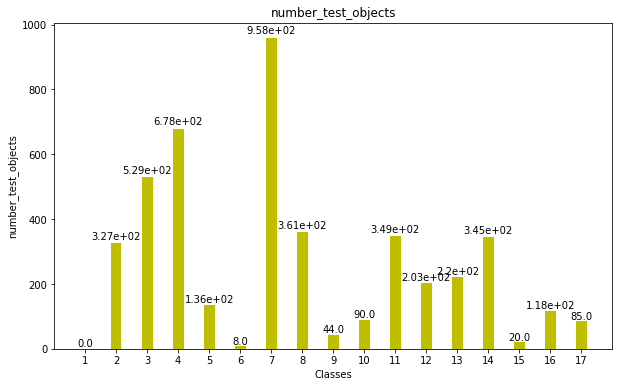

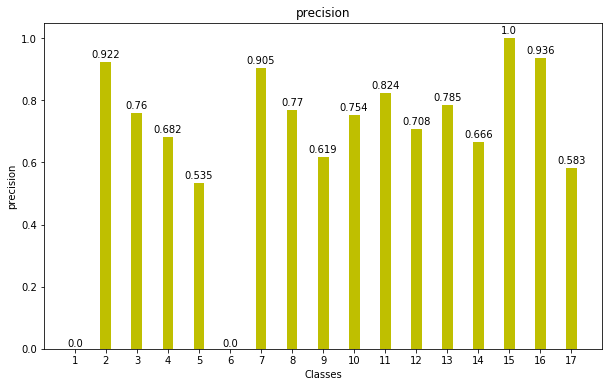

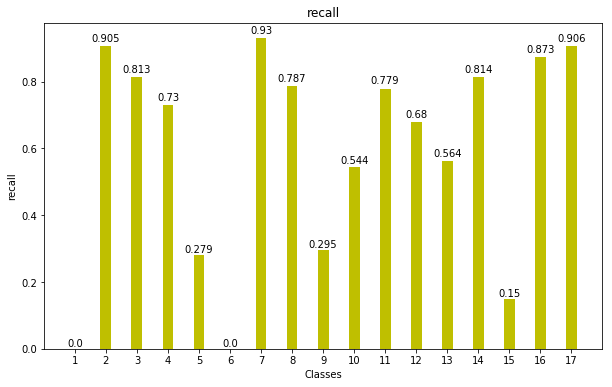

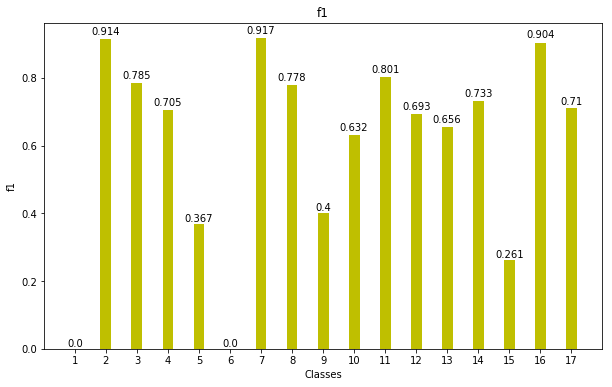

In [5]:
Manager = PipelineManager(language, dataset_name, file_name)
Manager.run(linear_pipe, linear_struct, 'linear')
Manager.run(neural_pipe, neural_struct, 'neural')

После прогона всех возможных комбинайций пайплайнов, можно посмотреть на результаты работы в виде таблицы и графиков, которые были продеманстрированы в прошлом отчёте. Также их можно посмотреть ниже.

In [6]:
root = join('./results', language, dataset_name,
            '{}-{}-{}'.format(date.year, date.month, date.day))
path = join(root, '{}-{}-{}'.format(date.year, date.month, date.day) + '.txt')

isfile(path)

info = scrab_data(path)
table, [name_best_model, best_model] = get_table(info, root)

print('The best model: {}'.format(name_best_model))
table

The best model: LinearSVC


,Accuracy,F1 macro,F1 weighted
Models,,,
LGBMClassifier,0.755531,0.583656,0.747231
Linear Regression,0.773631,0.591147,0.760679
LinearSVC,0.780782,0.616959,0.774502
RandomForestClassifier,0.639330,0.430965,0.617400
WCNN,0.738101,0.504050,0.719180


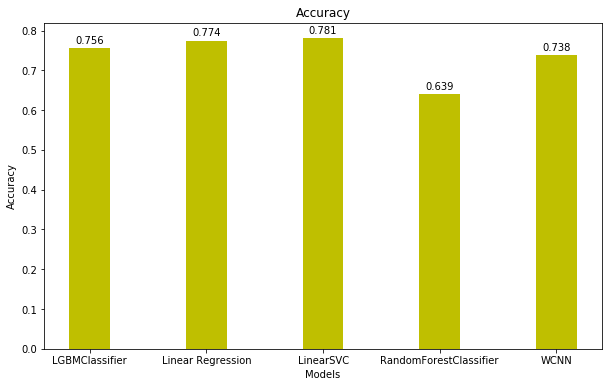

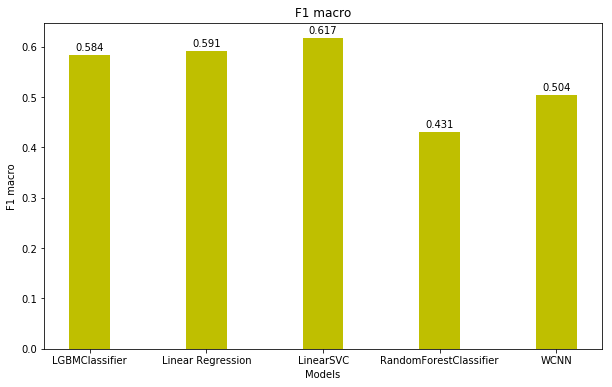

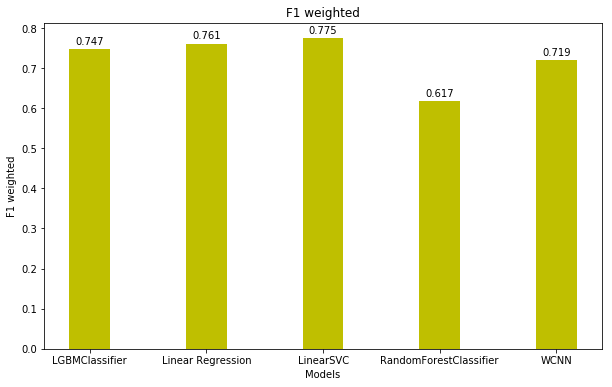

In [8]:
plot_i()

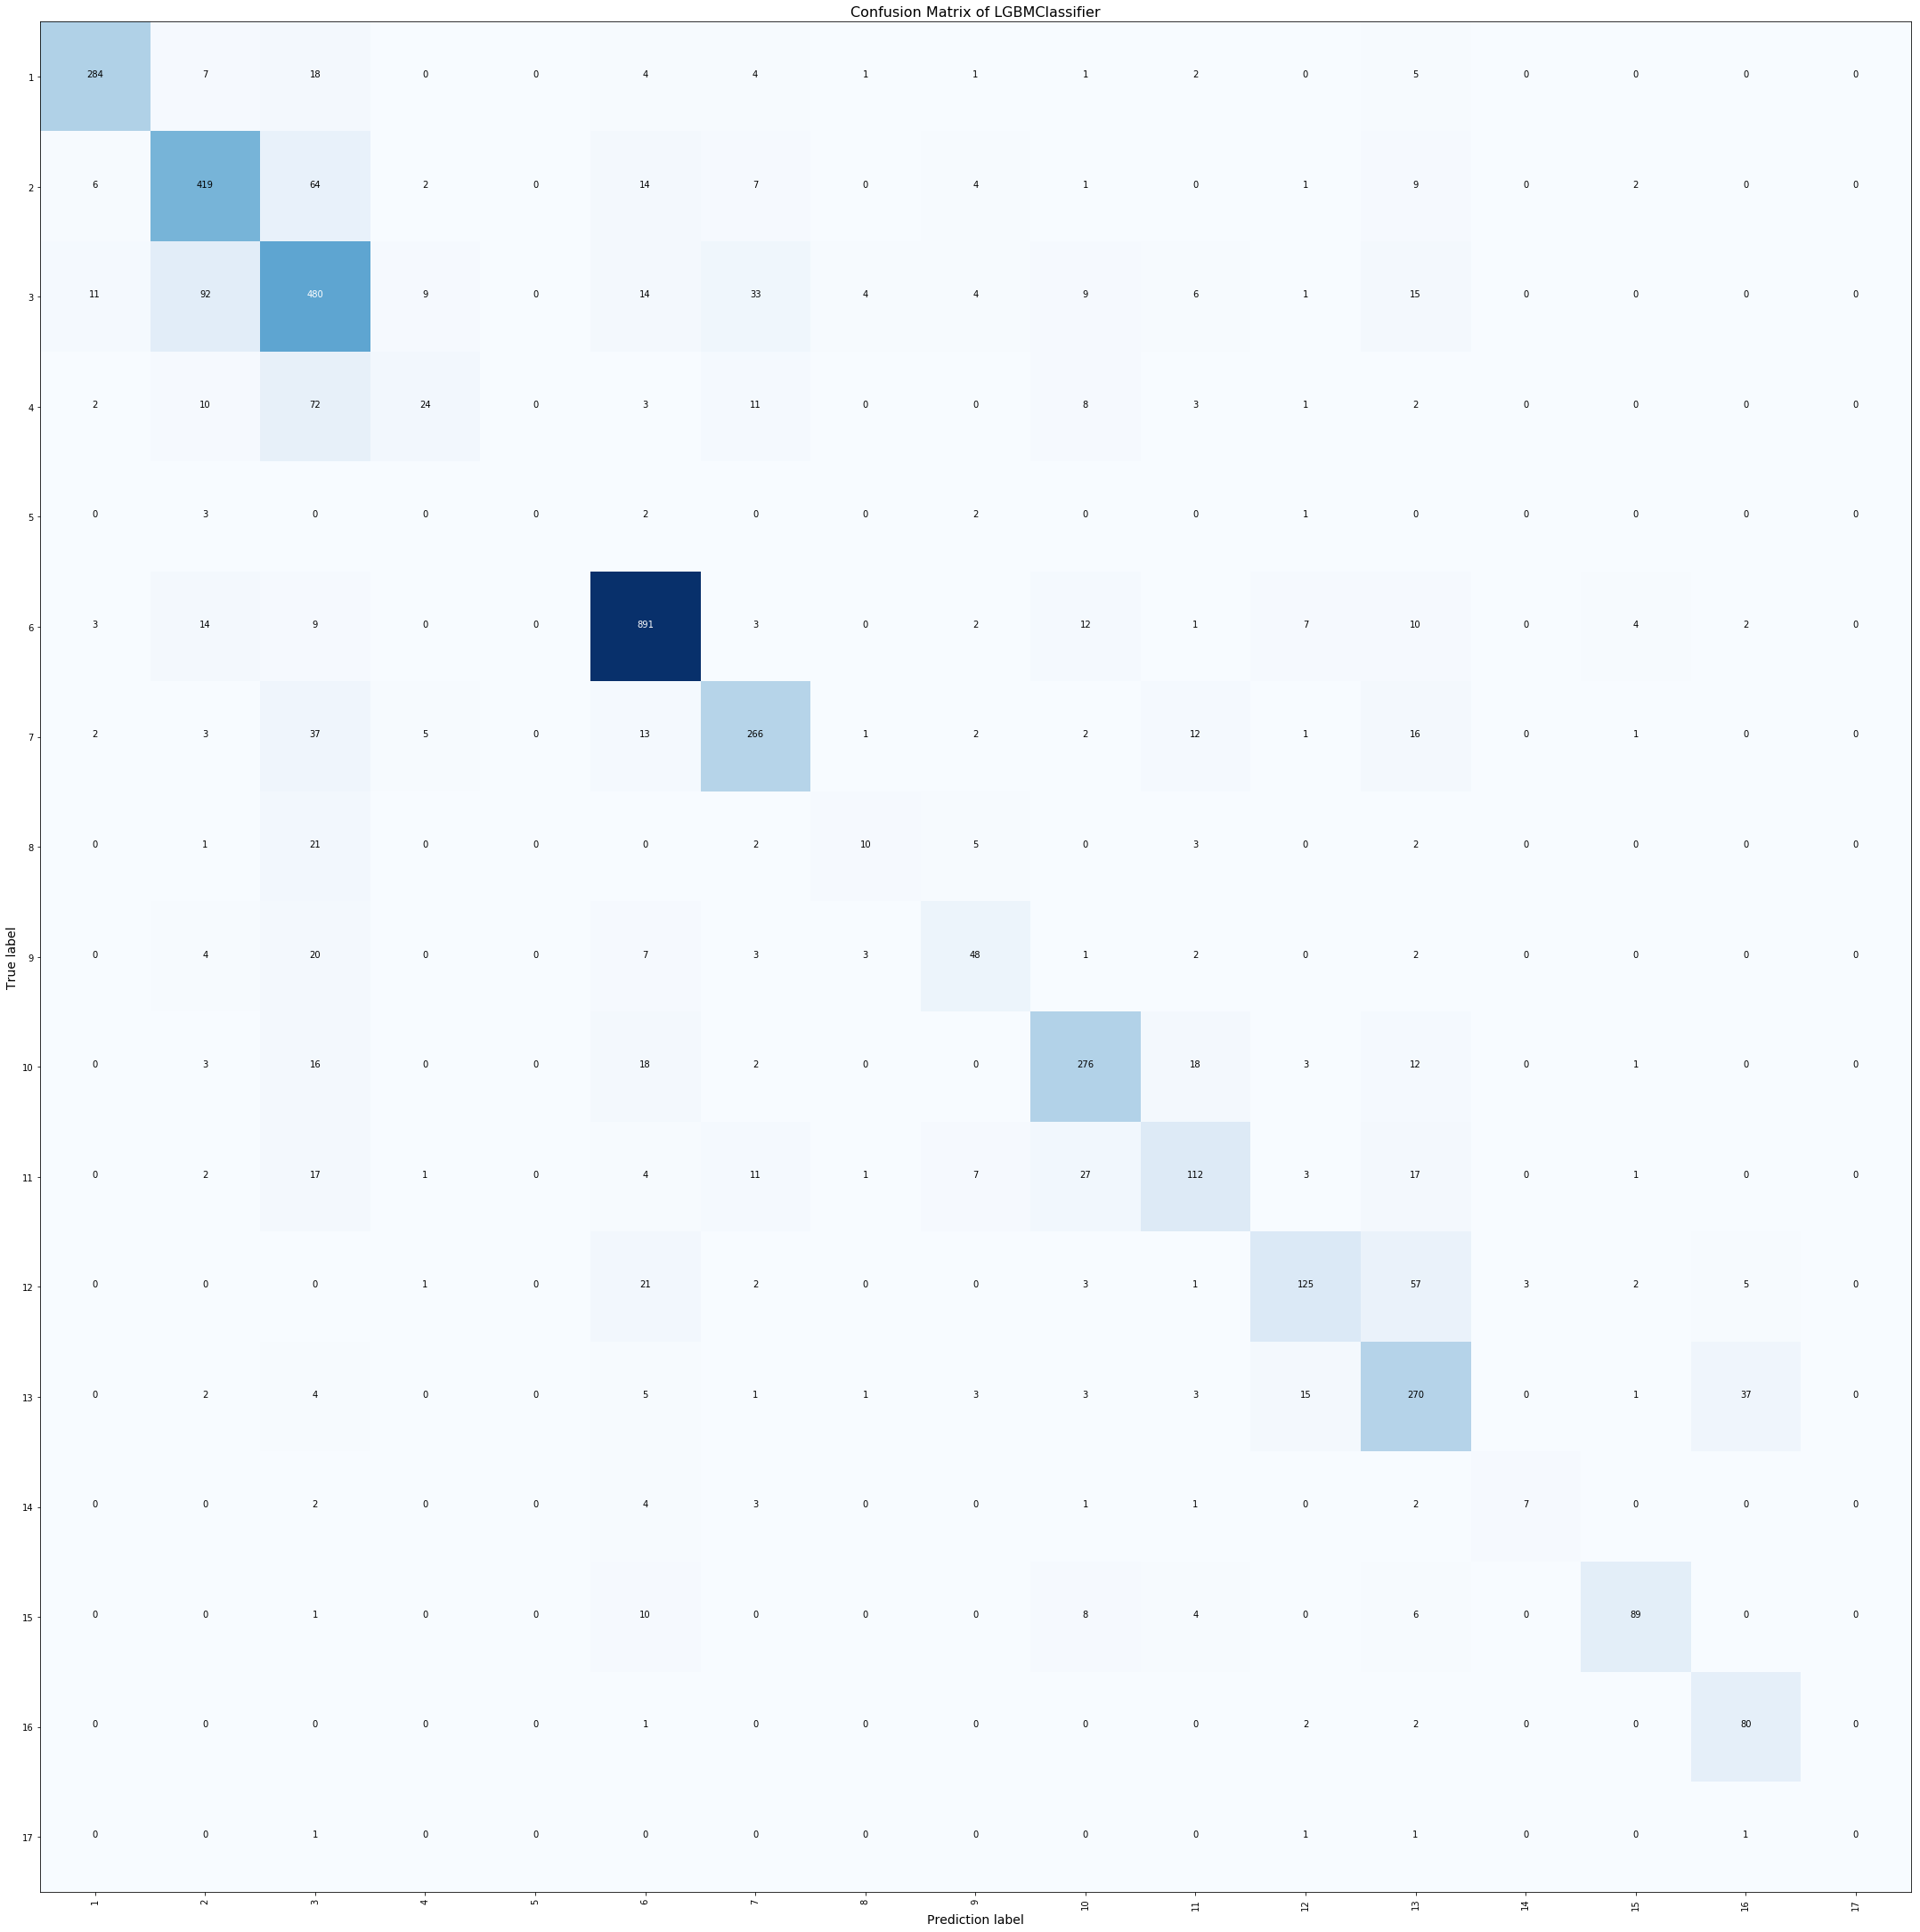

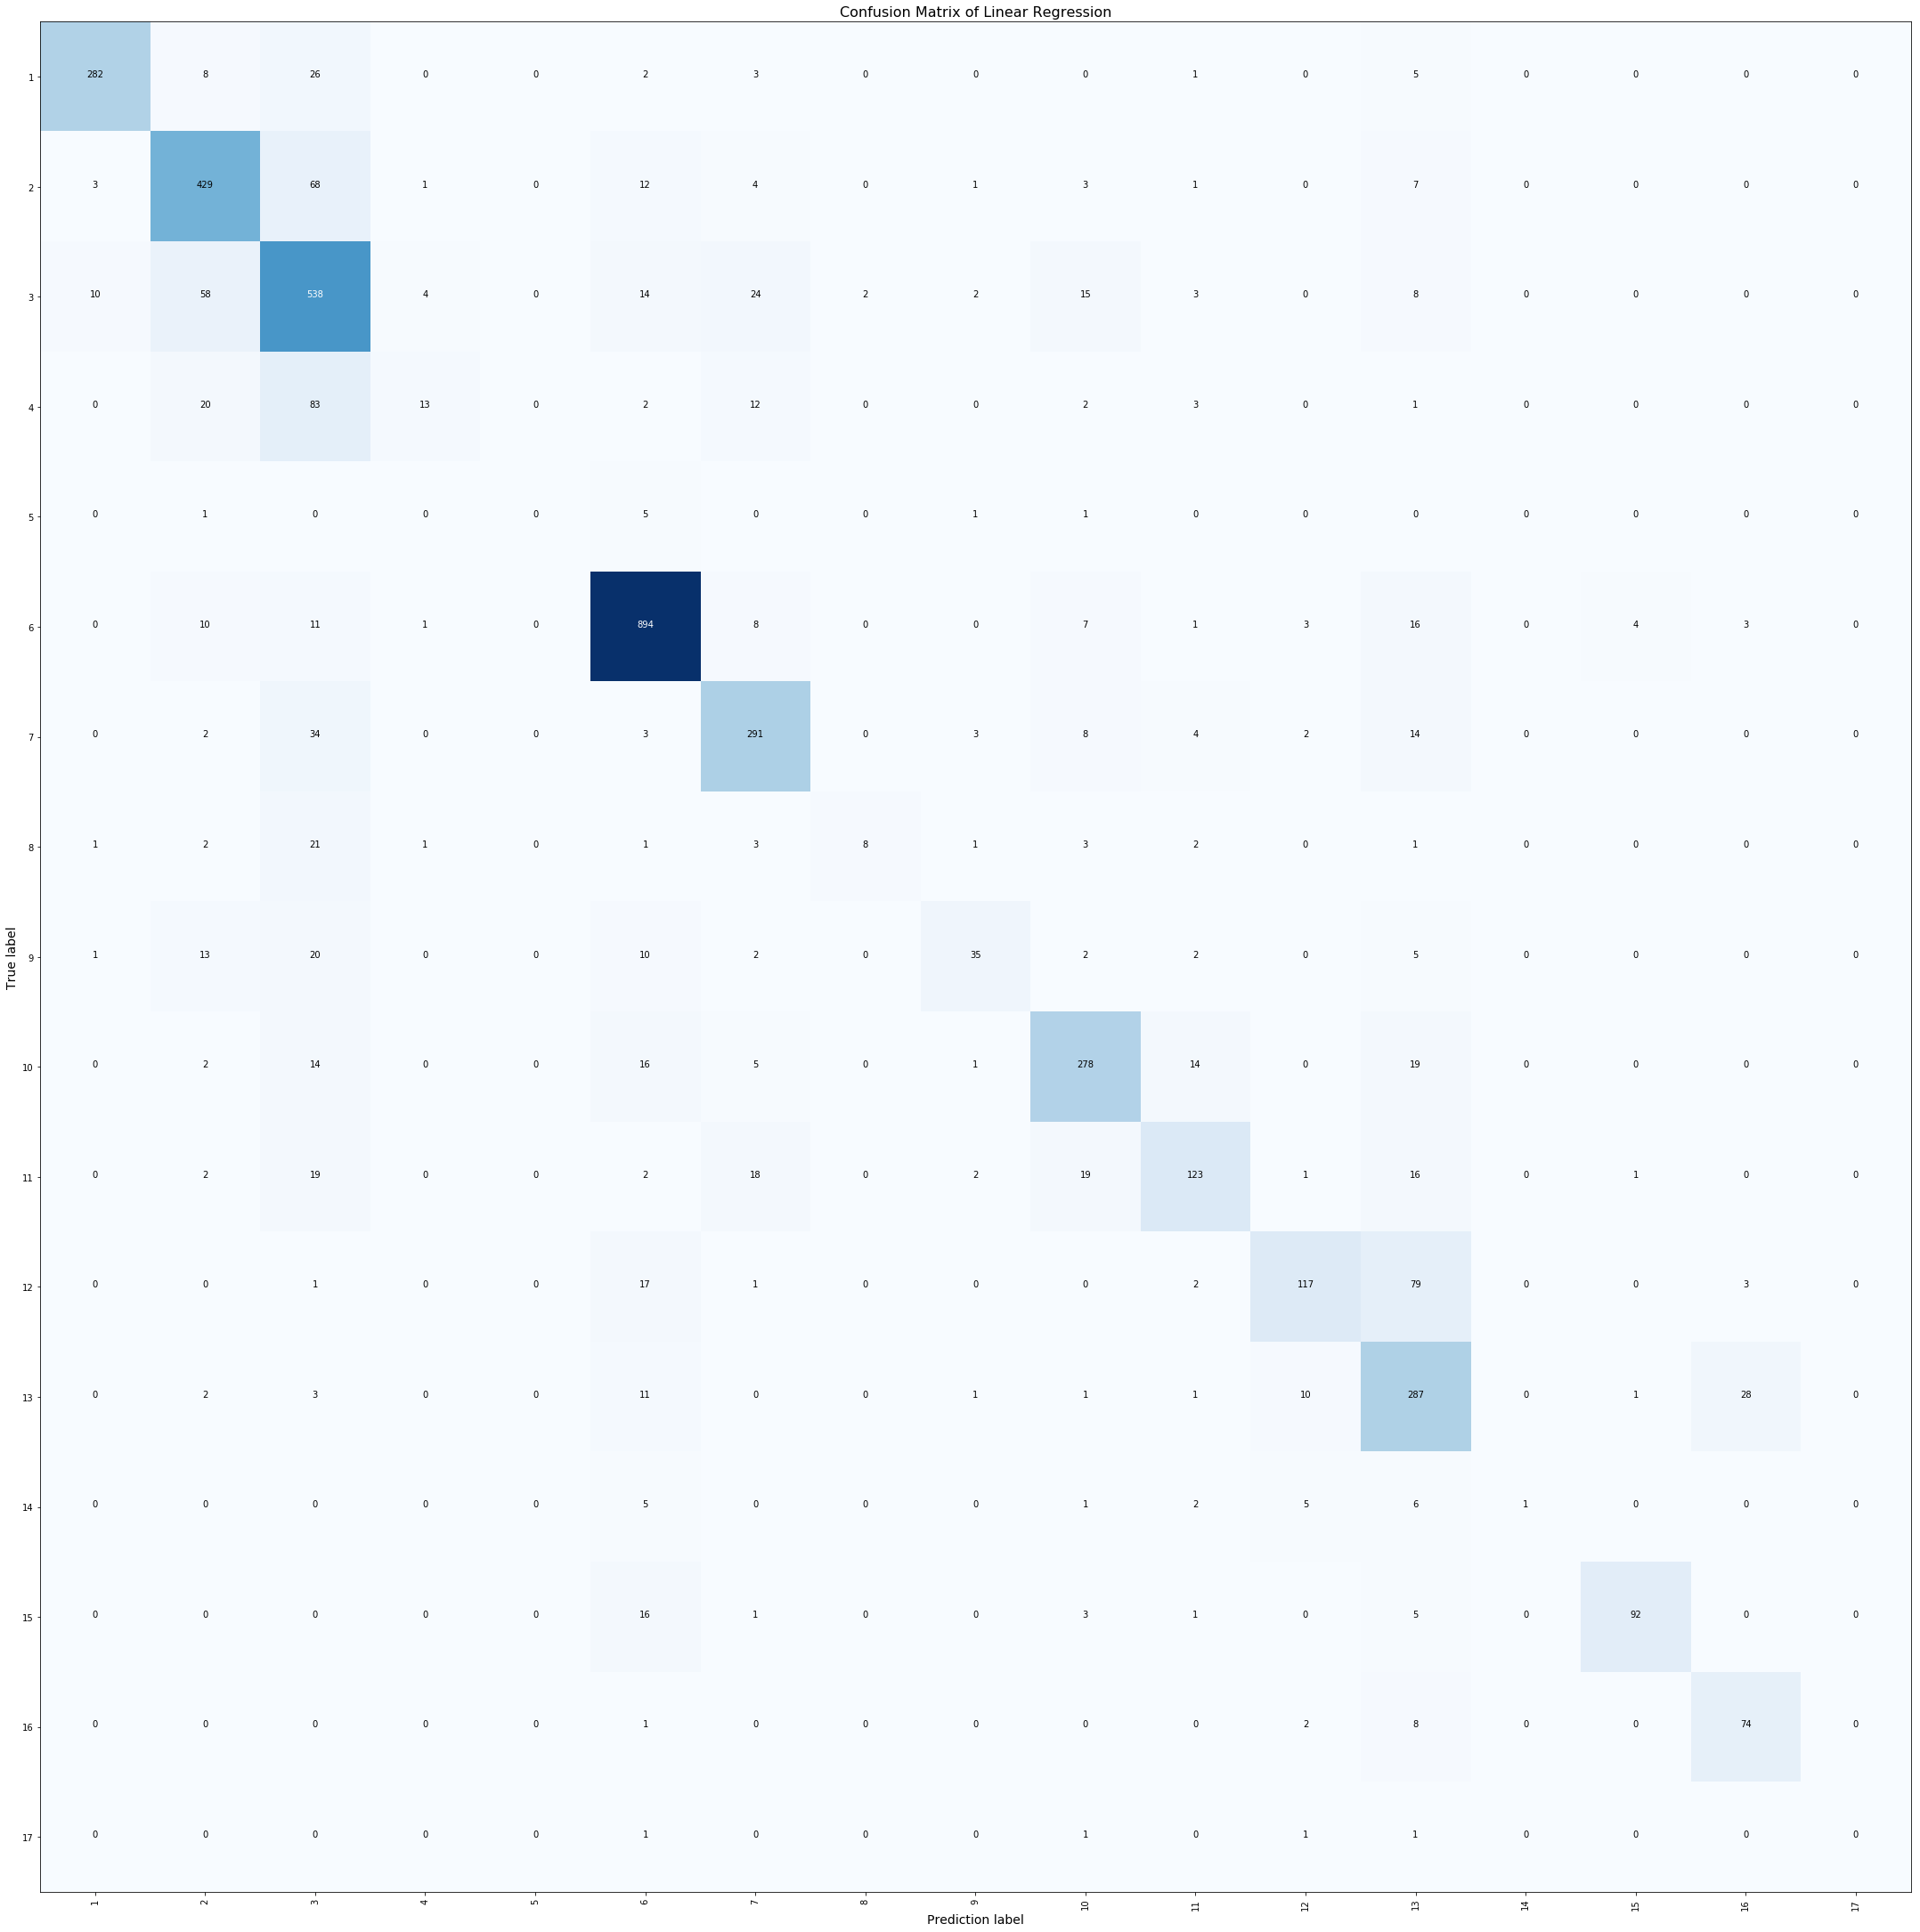

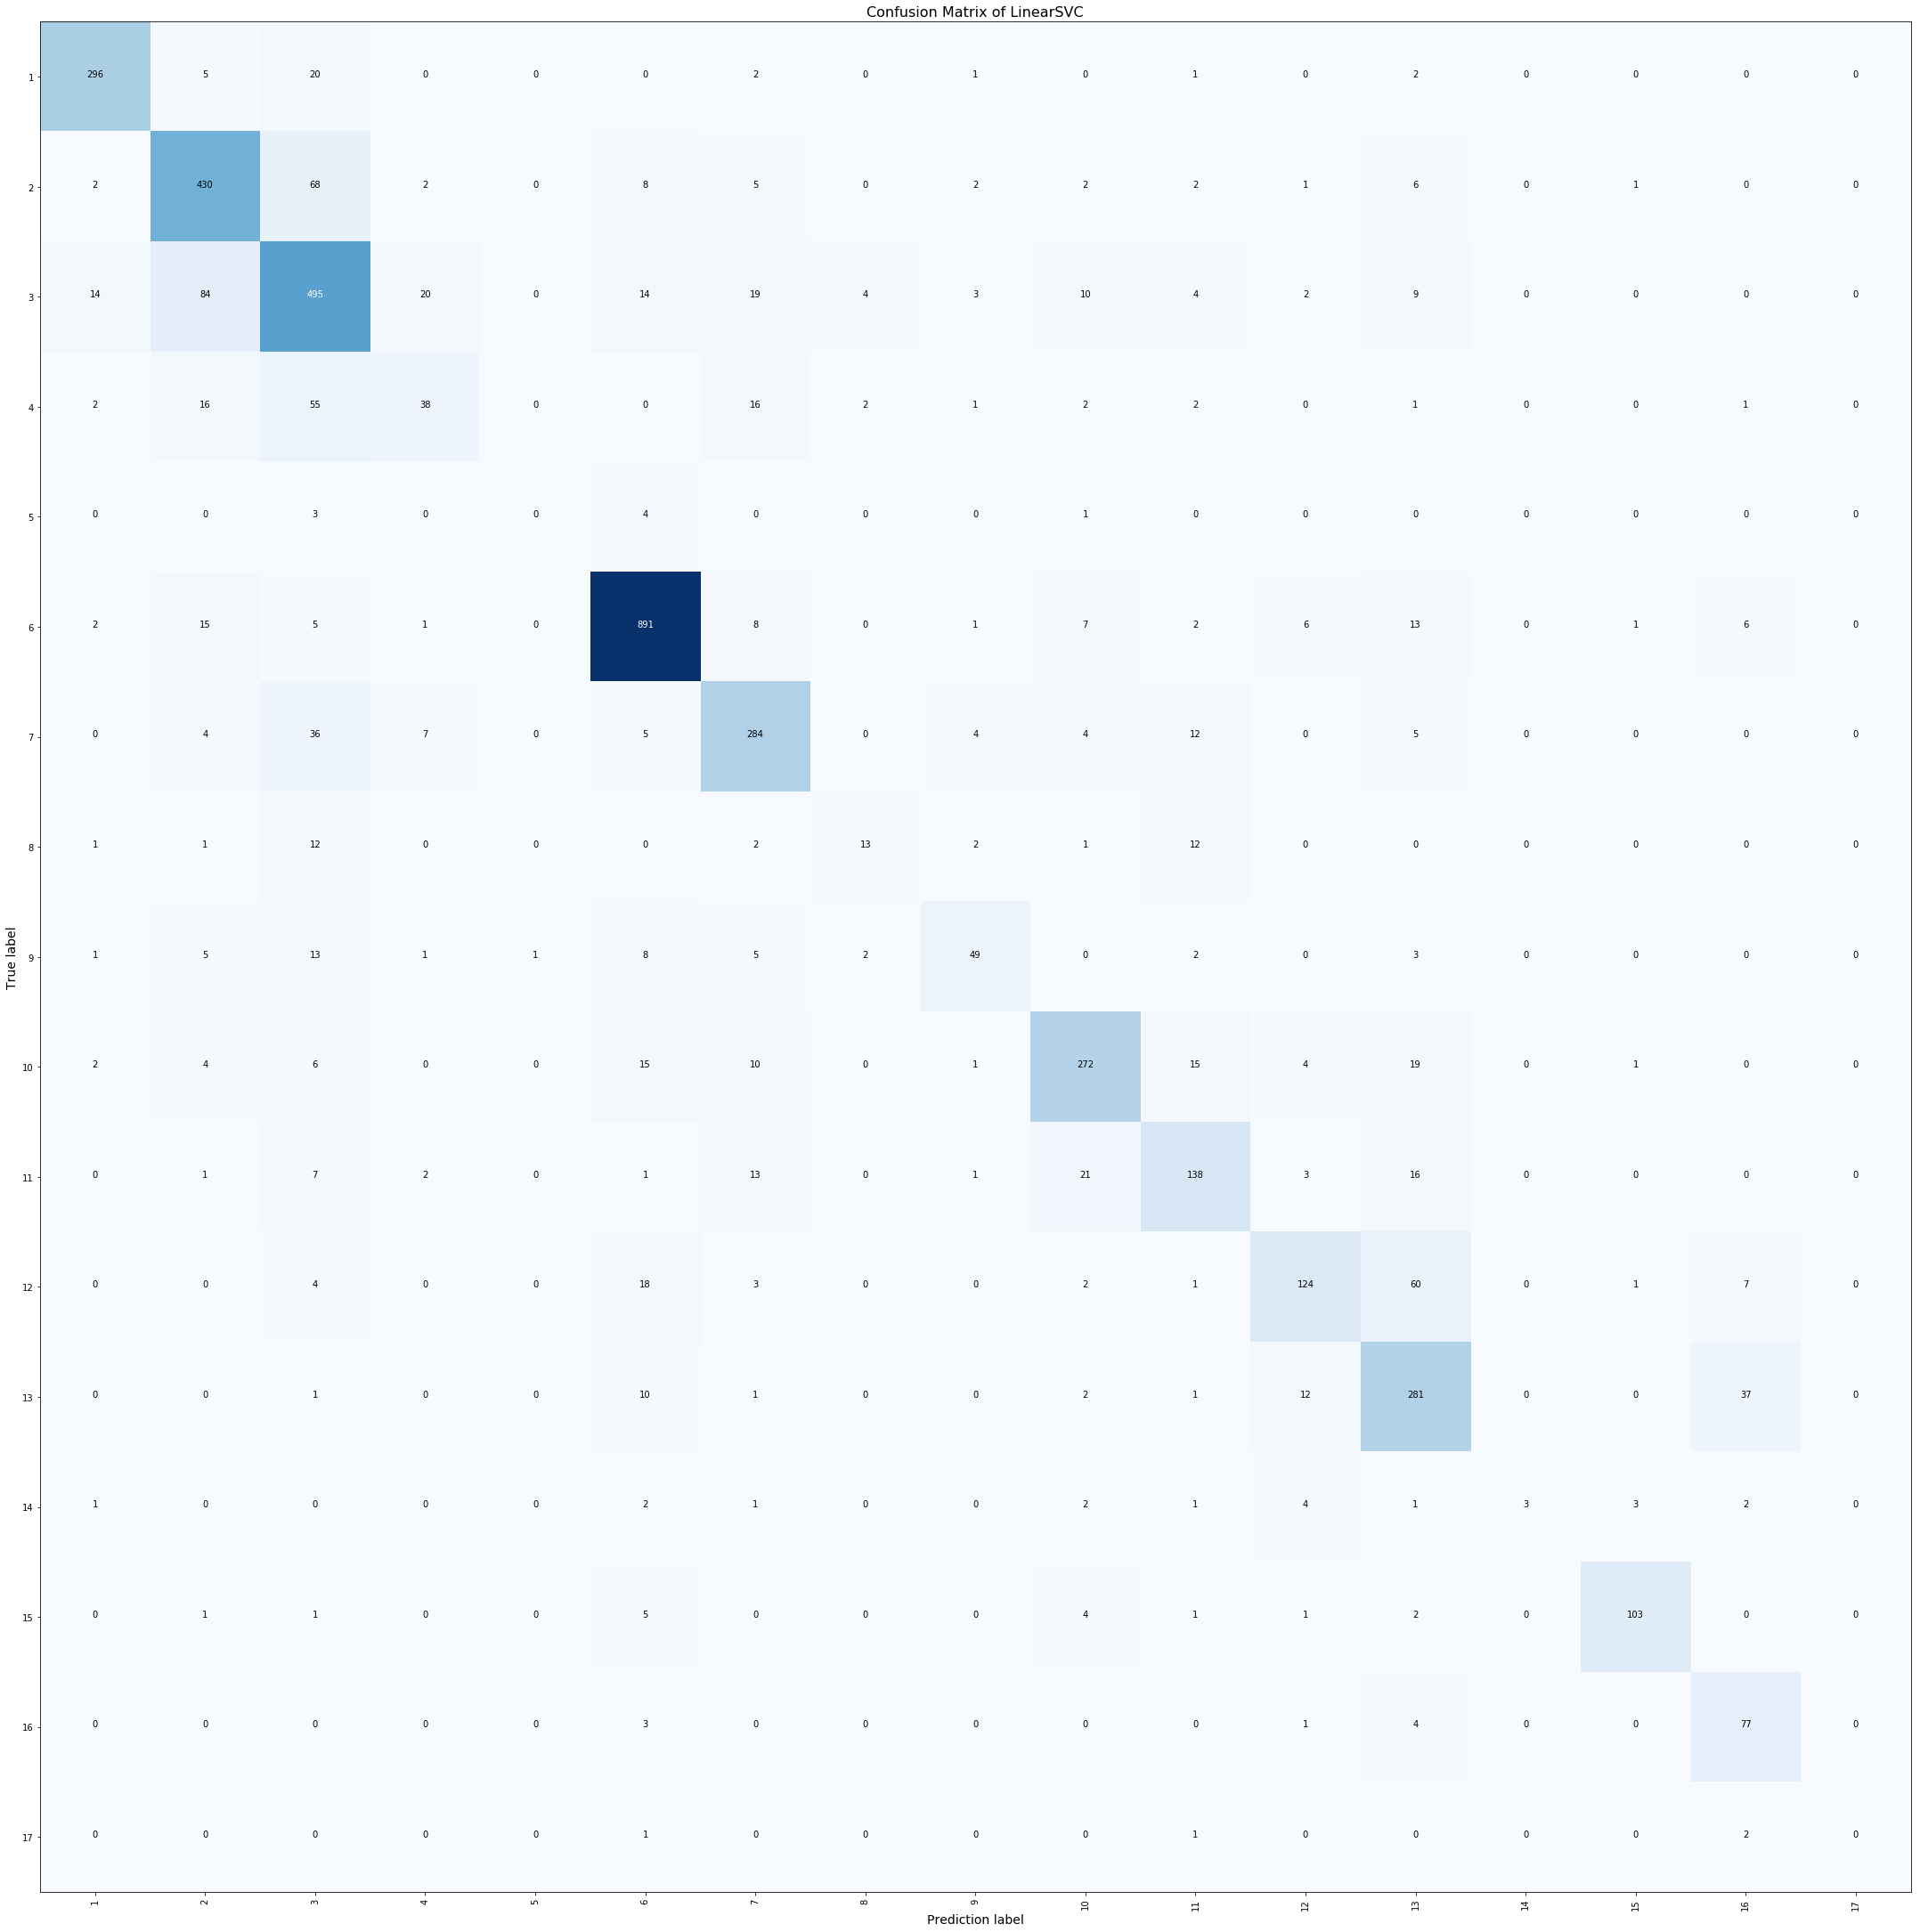

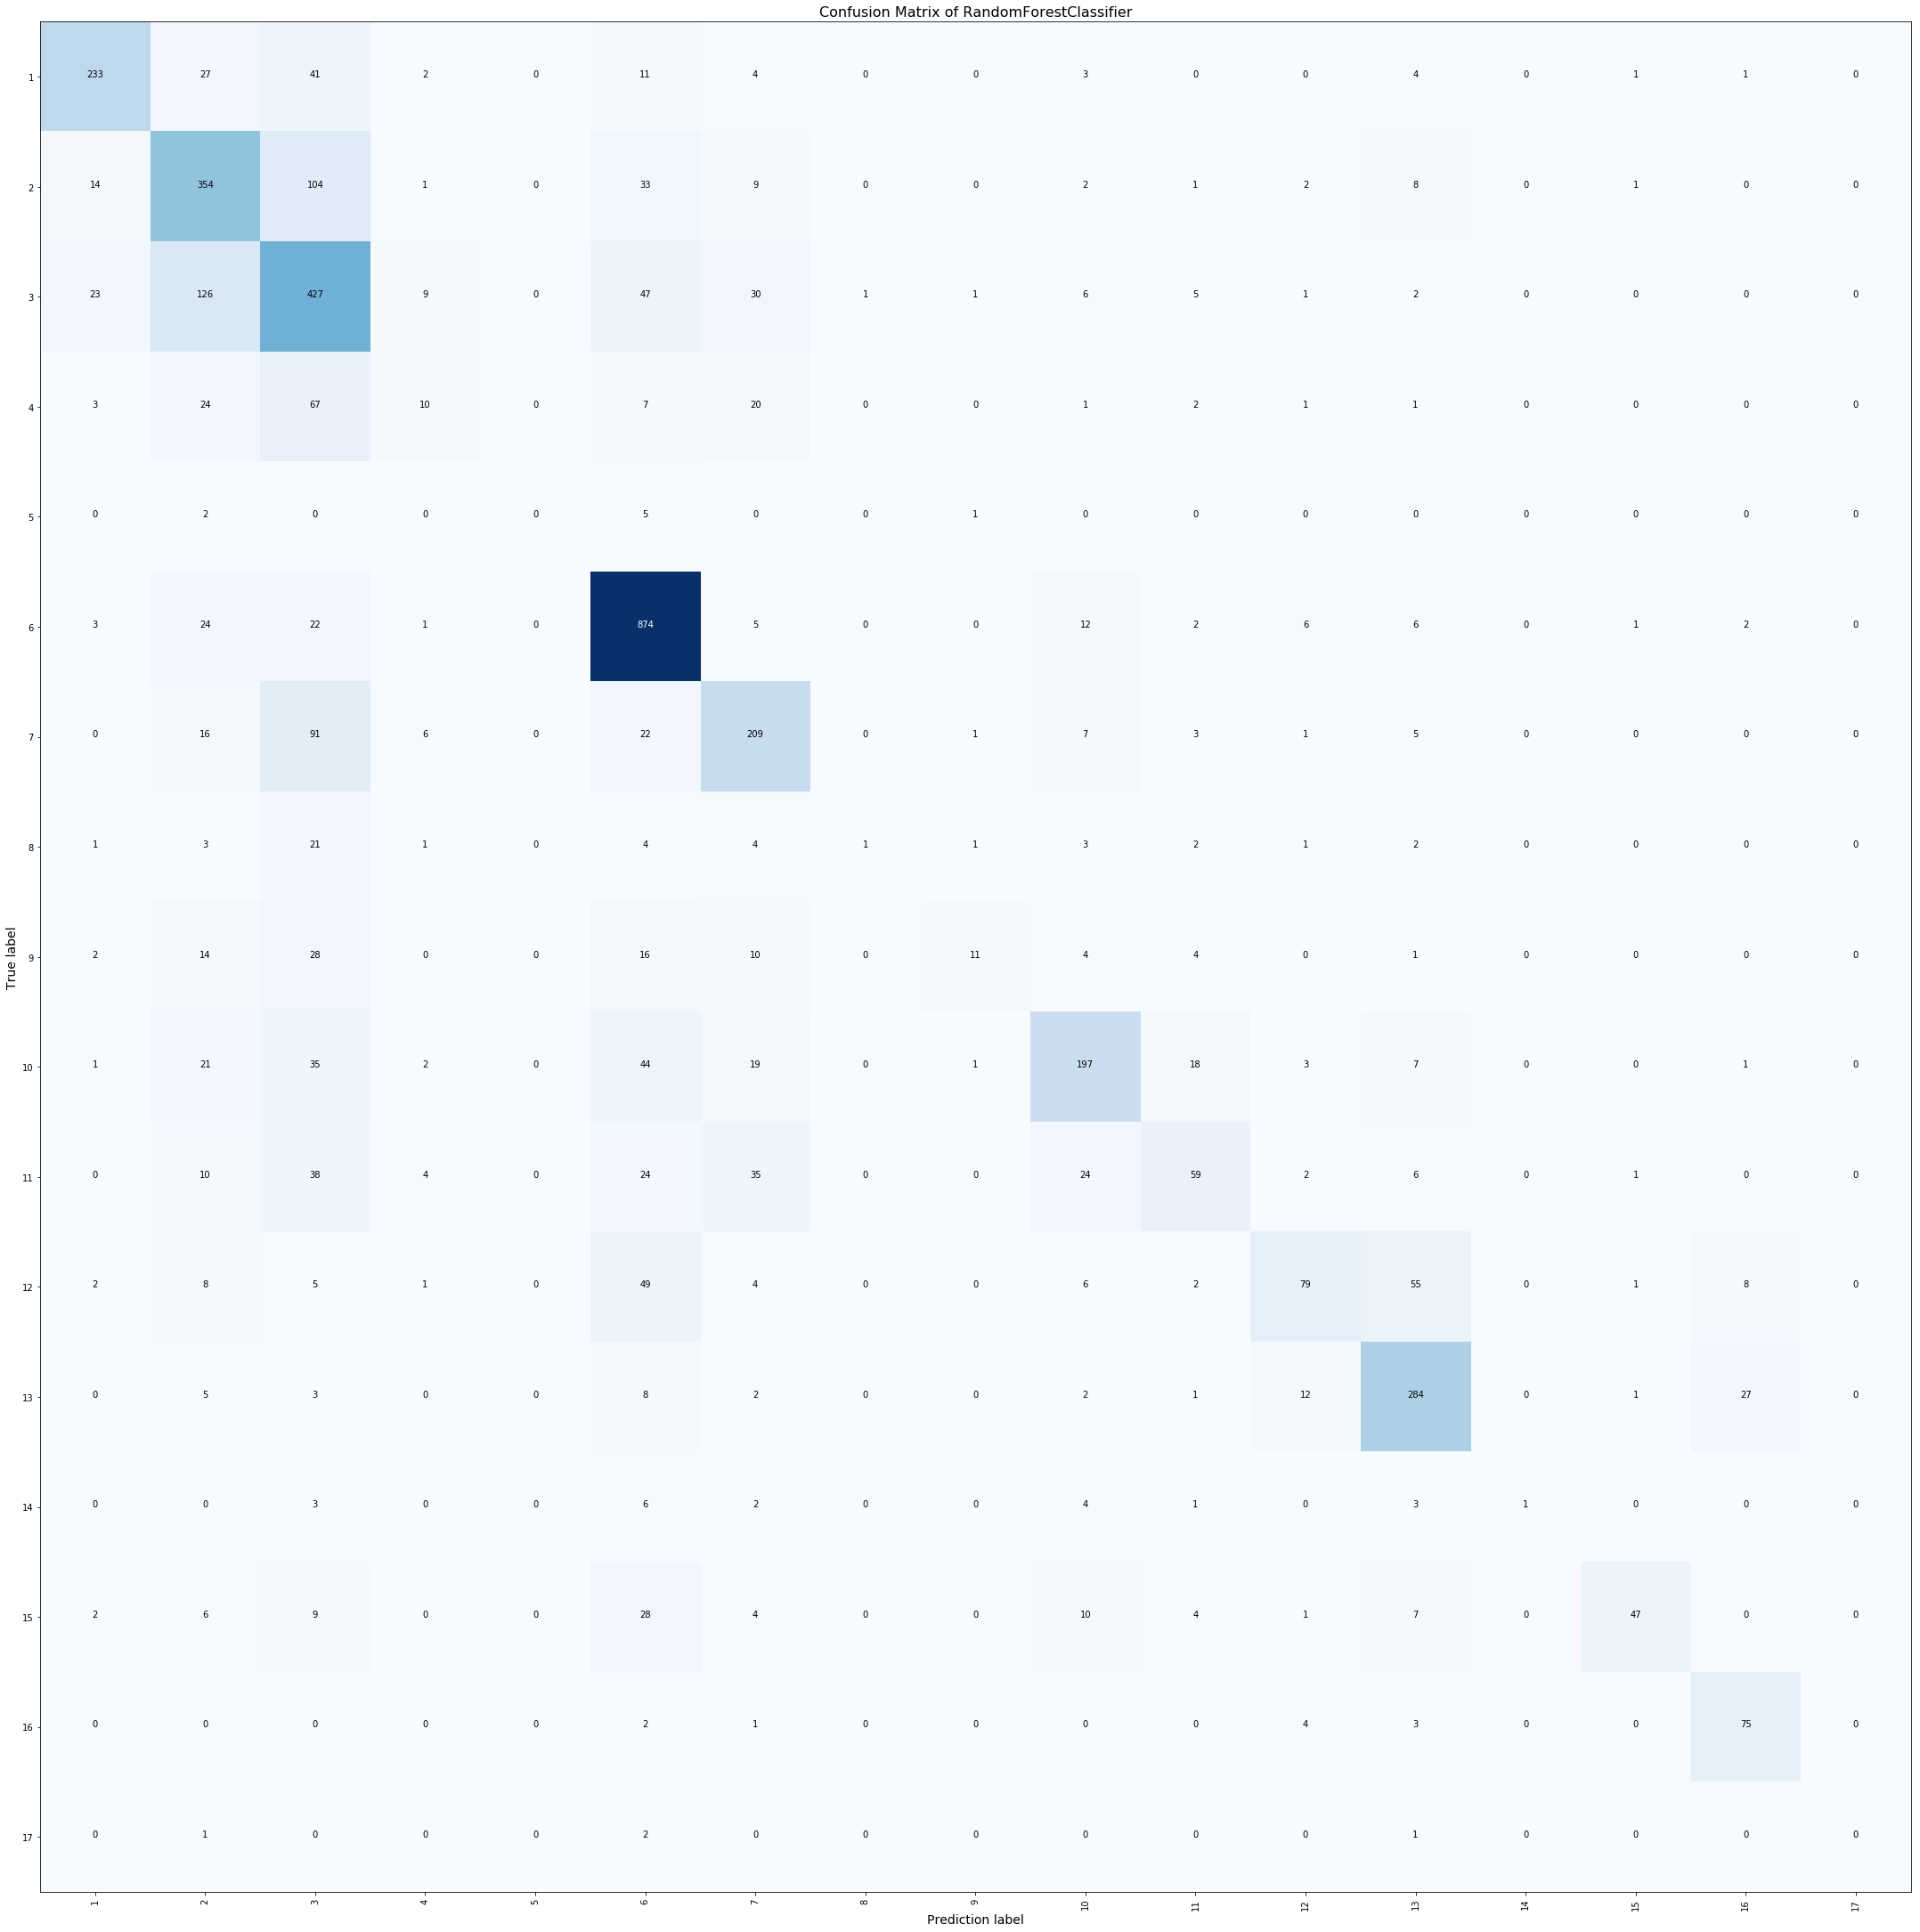

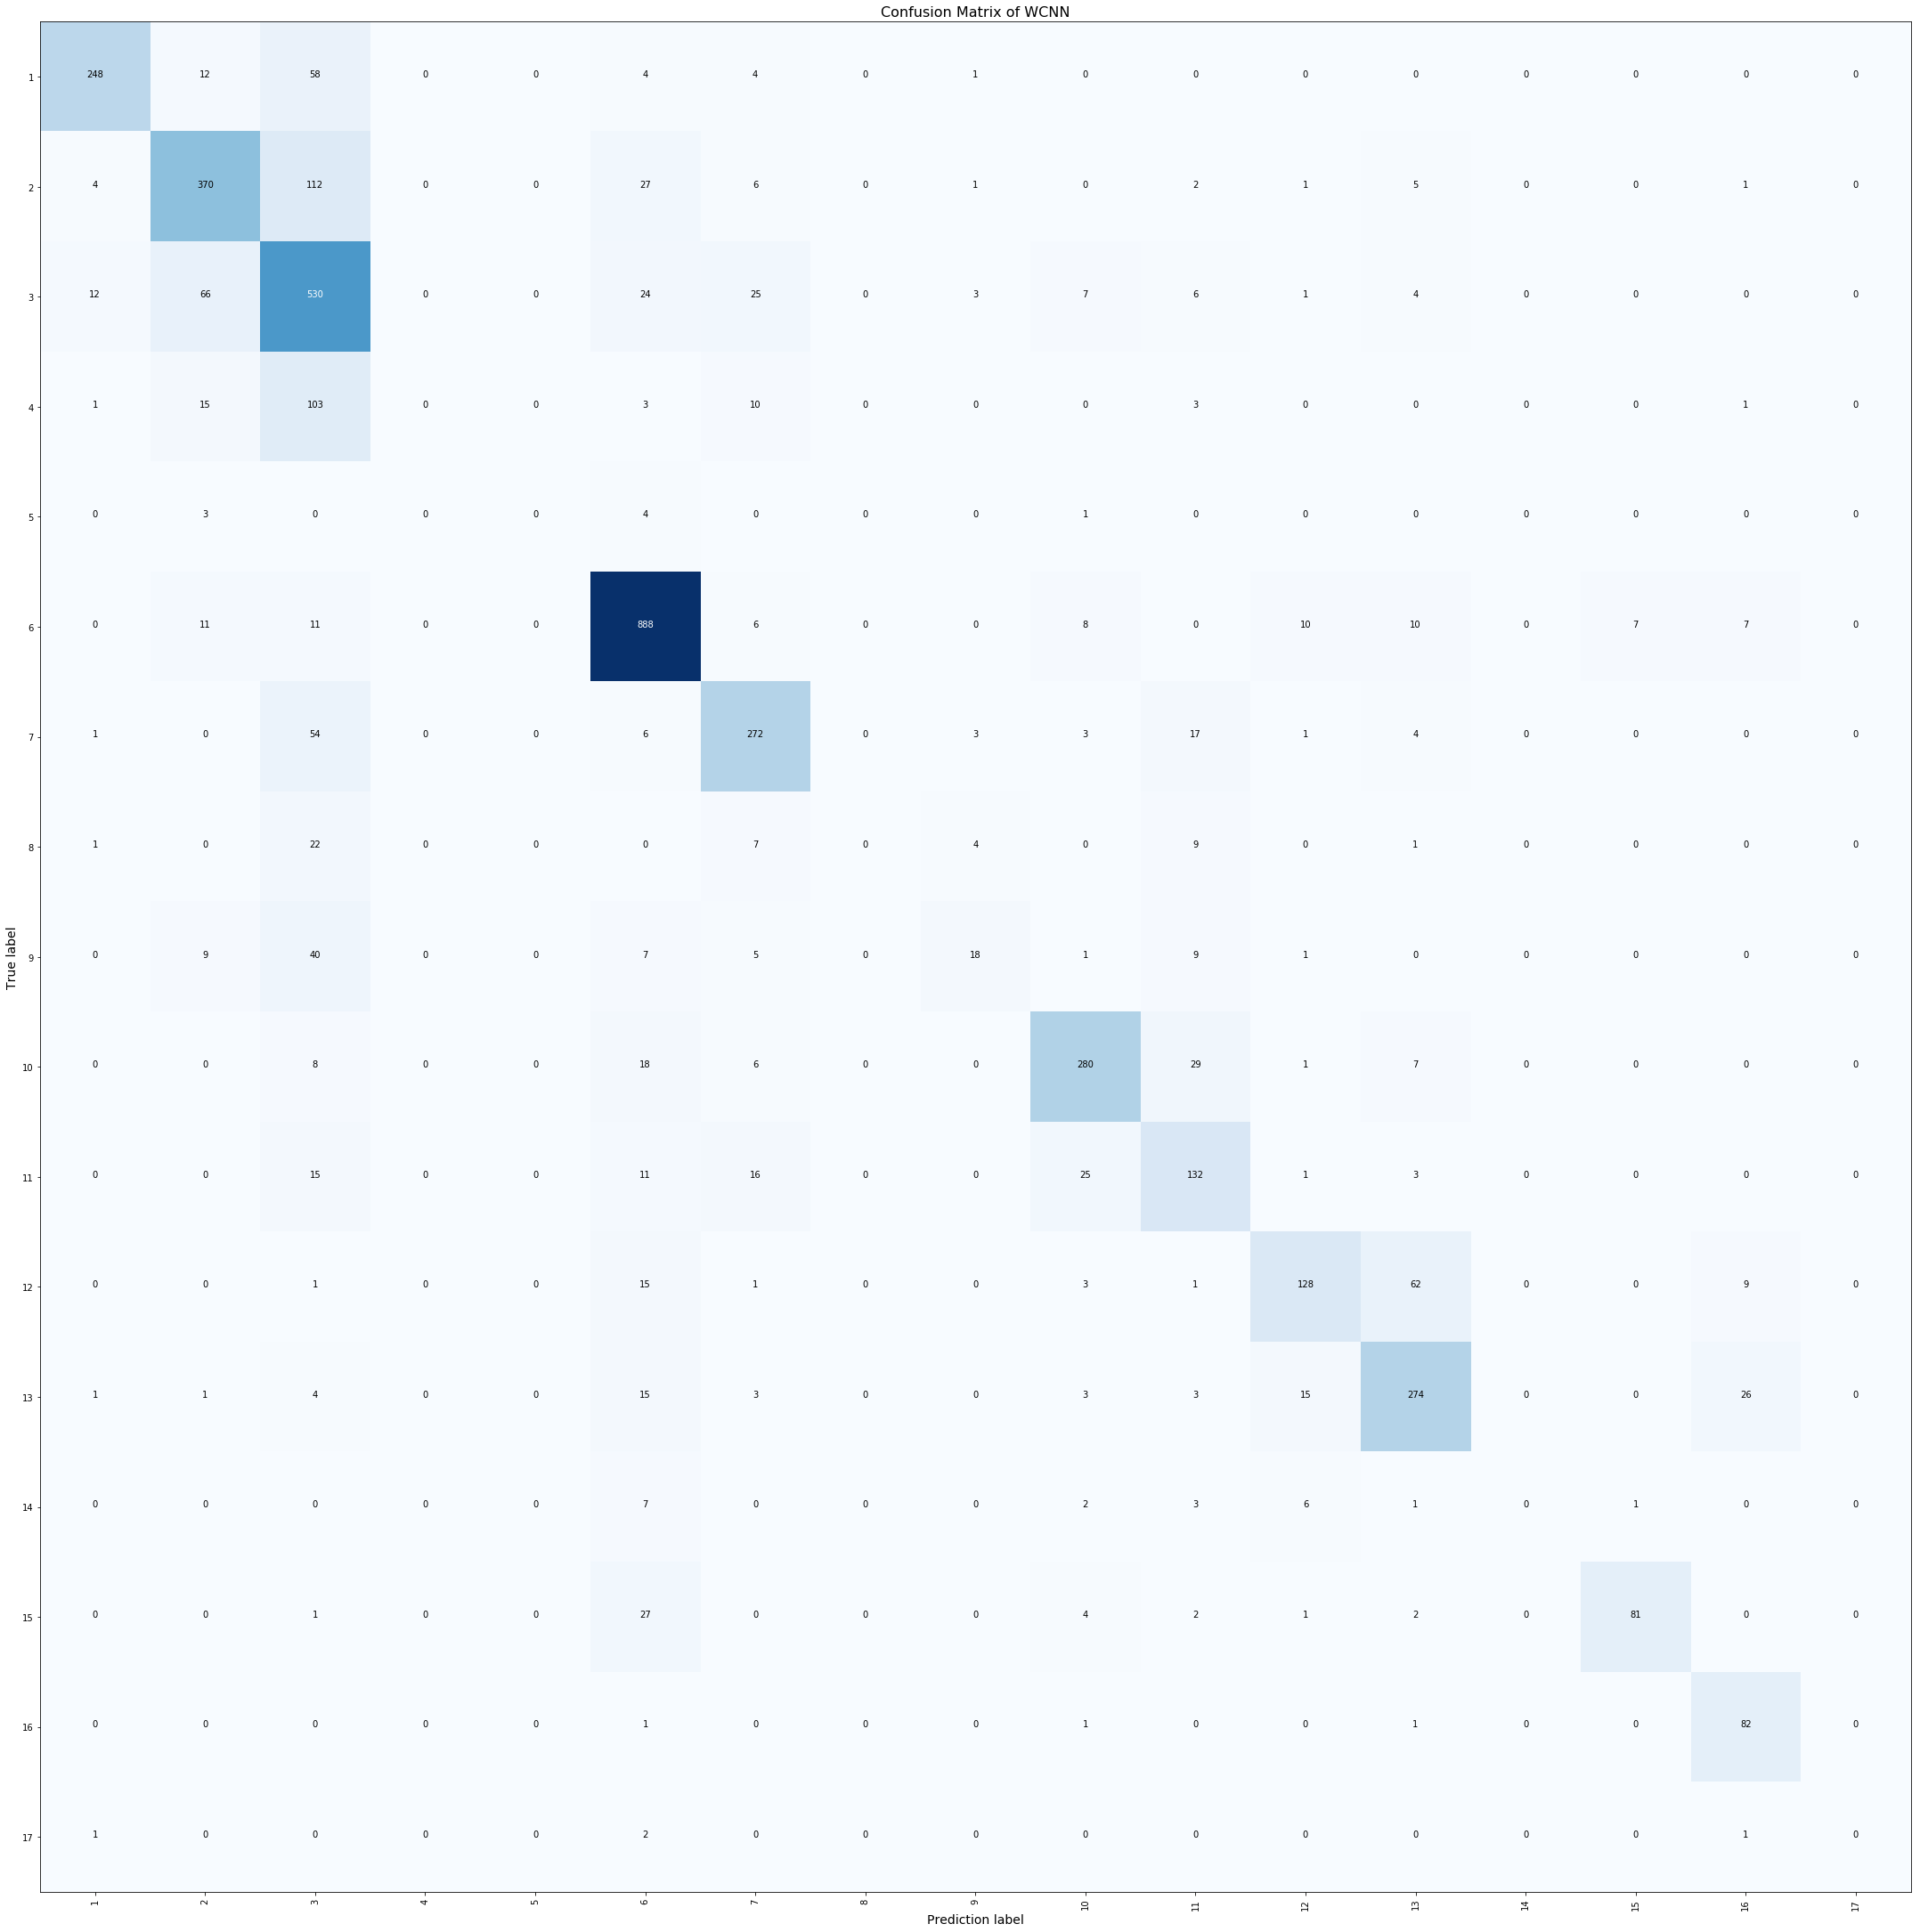

In [9]:
plot_j()

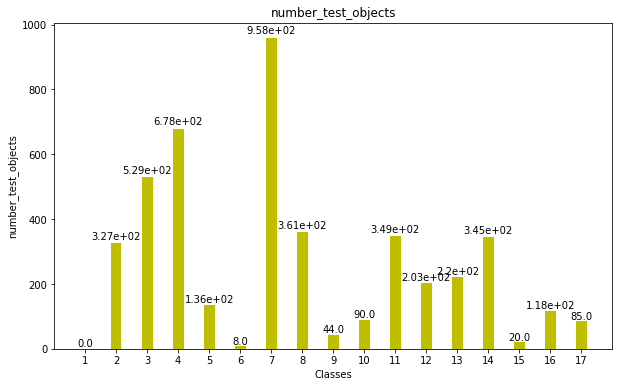

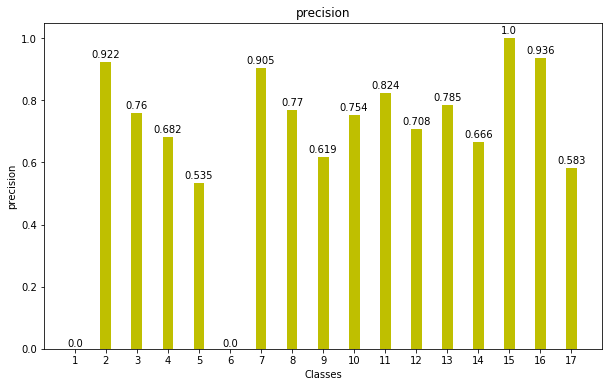

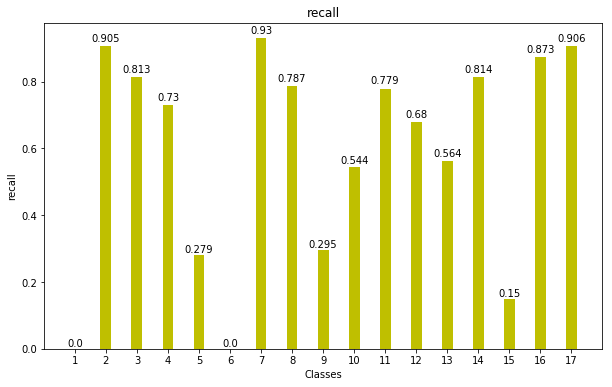

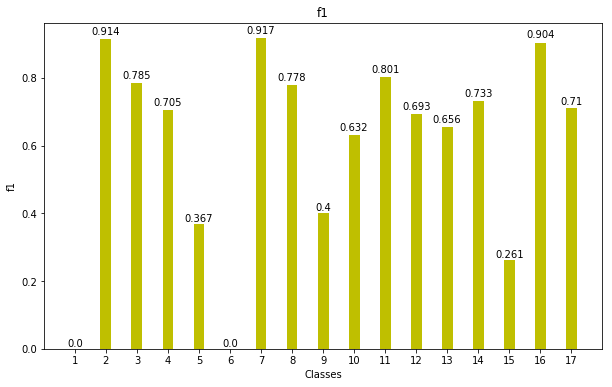

In [10]:
plot_k()

# Заключение

Скрипт вполне себе работает, я за эти несколько дней отловил и исправил кучу багов, на данный момент сборка вполне рабочая. Хотя вот пытаясь заскорится сразу на нескольких датасетах, понял что можно написать дополнительную более гибкую штуку которая автоматически бы прослеживала зависимости для разных датасетов, и соответственно автоматически изменяла нужные параметры в конфигурациях, подключала сама нужные эмбеддинги и т.д. Короче можно ещё наводить марафет, но в целом, заданный функционал эта штука выполняет.